In [1]:
import glob
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
model_to_index = {
    'bloomz-560m': 0,
    'bloomz-1b1': 1,
    'bloomz-1b7': 2,
    'bloomz-3b': 3,
    'bloomz-7b1': 4,
    'mt0-small': 5,
    'mt0-base': 6,
    'mt0-large': 7,
    'mt0-xl': 8,
    'mt0-xxl': 9,
    'bactrian-x-bloom-7b1-lora': 10,
    'bactrian-id-bloom-7b1-lora': 11,
    'Llama-2-13b-chat-hf': 12, 
    'Llama-2-7b-chat-hf': 13,
    'sealion7b-instruct-nc': 14, 
    'SeaLLM-7B-Chat': 15,
    'Merak-7B-v4': 16,
    'cendol-mt5-small': 20,
    'cendol-mt5-base': 21,
    'cendol-mt5-large': 22,
    'cendol-mt5-xl': 23,
    'cendol-mt5-xxl-merged': 24,
    'cendol-llama2-7b': 25,
    'cendol-llama2-13b-merged': 26,
    'cendol-mt5-small-chat': 27,
    'cendol-mt5-base-chat': 28,
    'cendol-mt5-large-chat': 29,
    'cendol-mt5-xl-chat': 30,
    'cendol-mt5-xxl-merged-chat': 31,
    'cendol-llama2-7b-chat': 32,
    'cendol-llama2-13b-merged-chat': 33
}

model_to_display_name = {
    'bloomz-560m': 'BLOOMZ\n560M',
    'bloomz-1b1': 'BLOOMZ\n1.1B',
    'bloomz-1b7': 'BLOOMZ\n1.7B',
    'bloomz-3b': 'BLOOMZ\n3B',
    'bloomz-7b1': 'BLOOMZ\n7.1B',
    'mt0-small': 'mT0\nSmall',
    'mt0-base': 'mT0\nBase',
    'mt0-large': 'mT0\nLarge',
    'mt0-xl': 'mT0\nXL',
    'mt0-xxl': 'mT0\nXXL',
    'bactrian-x-bloom-7b1-lora': 'Bactrian\n-X',
    'bactrian-id-bloom-7b1-lora': 'Bactrian\n-Id',
    'Llama-2-7b-chat-hf': 'LLaMA2\n7B Chat', 
    'Llama-2-13b-chat-hf': 'LLaMA2\n13B Chat', 
    'sealion7b-instruct-nc': 'SEALION\n7B Instruct', 
    'SeaLLM-7B-Chat': 'SeaLLM\n7B Chat',
    'Merak-7B-v4': 'Merak\n7B v4',
    'cendol-mt5-small': 'Cendol\nmT5 Small',
    'cendol-mt5-base': 'Cendol\nmT5 Base',
    'cendol-mt5-large': 'Cendol\nmT5 Large',
    'cendol-mt5-xl': 'Cendol\nmT5 XL',
    'cendol-mt5-xxl-merged': 'Cendol\nmT5 XXL',
    'cendol-llama2-7b': 'Cendol\nLLaMA2 7B',
    'cendol-llama2-13b-merged': 'Cendol\nLLaMA2 13B',
    'cendol-mt5-small-chat': 'Cendol mT5\nSmall Chat',
    'cendol-mt5-base-chat': 'Cendol mT5\nBase Chat',
    'cendol-mt5-large-chat': 'Cendol mT5\nLarge Chat',
    'cendol-mt5-xl-chat': 'Cendol mT5\nXL Chat',
    'cendol-mt5-xxl-merged-chat': 'Cendol mT5\nXXL Chat',
    'cendol-llama2-7b-chat': 'Cendol LLaMA2\n7B Chat',
    'cendol-llama2-13b-merged-chat':'Cendol LLaMA2\n13B Chat'
}

# model_to_color = {
#     'bloomz-560m': 'gray',
#     'bloomz-1b1': 'gray',
#     'bloomz-1b7': 'gray',
#     'bloomz-3b': 'gray',
#     'bloomz-7b1': 'gray',
#     'mt0-small': 'g',
#     'mt0-base': 'g',
#     'mt0-large': 'g',
#     'mt0-xl': 'g',
#     'mt0-xxl': 'g',
#     'bactrian-x-bloom-7b1-lora': 'b',
#     'bactrian-id-bloom-7b1-lora': 'b',
#     'Llama-2-13b-chat-hf': 'purple', 
#     'Llama-2-7b-chat-hf': 'purple', 
#     'sealion7b-instruct-nc': 'orange',
#     'SeaLLM-7B-Chat': 'orange',
#     'Merak-7B-v4': 'yellow',
#     'cendol-mt5-small': 'r',
#     'cendol-mt5-base': 'r',
#     'cendol-mt5-large': 'r',
#     'cendol-mt5-xl': 'r',
#     'cendol-mt5-xxl-merged': 'r',
#     'cendol-llama2-7b': 'pink',
#     'cendol-llama2-13b-merged': 'pink',
#     'cendol-mt5-small-chat': 'r',
#     'cendol-mt5-base-chat': 'r',
#     'cendol-mt5-large-chat': 'r',
#     'cendol-mt5-xl-chat': 'r',
#     'cendol-mt5-xxl-merged-chat': 'r',
#     'cendol-llama2-7b-chat': 'pink',
#     'cendol-llama2-13b-merged-chat': 'pink'
# }

model_to_color = {
    'bloomz-560m': '#fe88b1',
    'bloomz-1b1': '#fe88b1',
    'bloomz-1b7': '#fe88b1',
    'bloomz-3b': '#fe88b1',
    'bloomz-7b1': '#fe88b1',
    'mt0-small': '#ffd557',
    'mt0-base': '#ffd557',
    'mt0-large': '#ffd557',
    'mt0-xl': '#ffd557',
    'mt0-xxl': '#ffd557',
    'bactrian-x-bloom-7b1-lora': '#2f8bc4',
    'bactrian-id-bloom-7b1-lora': '#2f8bc4',
    'Llama-2-13b-chat-hf': '#fe6f02', 
    'Llama-2-7b-chat-hf': '#fe6f02', 
    'sealion7b-instruct-nc': '#764e9f',
    'SeaLLM-7B-Chat': '#764e9f',
    'Merak-7B-v4': '#cc3134',
    'cendol-mt5-small': '#7bfa20',
    'cendol-mt5-base': '#7bfa20',
    'cendol-mt5-large': '#7bfa20',
    'cendol-mt5-xl': '#7bfa20',
    'cendol-mt5-xxl-merged': '#7bfa20',
    'cendol-llama2-7b': '#02ab39',
    'cendol-llama2-13b-merged': '#02ab39',
    'cendol-mt5-small-chat': '#73af48',
    'cendol-mt5-base-chat': '#73af48',
    'cendol-mt5-large-chat': '#73af48',
    'cendol-mt5-xl-chat': '#73af48',
    'cendol-mt5-xxl-merged-chat': '#73af48',
    'cendol-llama2-7b-chat': '#117733',
    'cendol-llama2-13b-merged-chat': '#117733'
}

In [8]:
dfs = []
for path in glob.glob('metrics_nlu/*.csv'):
    model = path[:-4].split('_')[-1]
    print(model)
    if model == 'sealion7b':
        continue
    elif "vocab" in model:
        continue
        
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

bloomz-7b1
cendol-llama2-13b-merged
cendol-mt5-large
bloomz-1b7
Llama-2-7b-chat-hf
cendol-mt5-small-chat
bloomz-560m
mt0-xxl
SeaLLM-7B-Chat
cendol-llama2-13b-merged
bloomz-1b1
cendol-mt5-base
cendol-llama2-7b
cendol-mt5-small
Llama-2-7b-chat-hf
cendol-llama2-7b-ind-vocab-done
bloomz-3b
mt0-large
cendol-mt5-xxl-merged-chat
bloomz-560m
cendol-mt5-small-chat
sealion7b
bactrian-id-bloom-7b1-lora
mt0-base
mt0-small
cendol-mt5-base-chat
mt0-xl
cendol-mt5-base
Llama-2-13b-chat-hf
Llama-2-13b-chat-hf
cendol-mt5-xl-chat
cendol-llama2-13b-merged-chat
cendol-mt5-large
bloomz-1b1
cendol-mt5-xxl-merged
bactrian-id-bloom-7b1-lora
cendol-mt5-large-chat
sealion7b-instruct-nc
Merak-7B-v4
cendol-mt5-xxl-merged-chat
cendol-mt5-small
bloomz-7b1
cendol-llama2-7b-chat
bloomz-1b7
cendol-mt5-xl-chat
cendol-llama2-7b
cendol-mt5-xl
cendol-llama2-7b-chat
bactrian-x-bloom-7b1-lora
bactrian-x-bloom-7b1-lora
mt0-xxl
mt0-xl
cendol-mt5-large-chat
cendol-mt5-xl
mt0-large
cendol-llama2-13b-merged-chat
bloomz-3b
sealion

In [4]:
df.shape, df.dropna().shape

((4650, 15), (4650, 15))

In [5]:
df.model.unique()

array(['bloomz-7b1', 'cendol-llama2-13b-merged', 'cendol-mt5-large',
       'bloomz-1b7', 'Llama-2-7b-chat-hf', 'cendol-mt5-small-chat',
       'bloomz-560m', 'mt0-xxl', 'SeaLLM-7B-Chat', 'bloomz-1b1',
       'cendol-mt5-base', 'cendol-llama2-7b', 'cendol-mt5-small',
       'bloomz-3b', 'mt0-large', 'cendol-mt5-xxl-merged-chat',
       'bactrian-id-bloom-7b1-lora', 'mt0-base', 'mt0-small',
       'cendol-mt5-base-chat', 'mt0-xl', 'Llama-2-13b-chat-hf',
       'cendol-mt5-xl-chat', 'cendol-llama2-13b-merged-chat',
       'cendol-mt5-xxl-merged', 'cendol-mt5-large-chat',
       'sealion7b-instruct-nc', 'Merak-7B-v4', 'cendol-llama2-7b-chat',
       'cendol-mt5-xl', 'bactrian-x-bloom-7b1-lora'], dtype=object)

### Check Per Dataset

In [6]:
df = df.dropna()

In [7]:
df[(df['lang'] == 'ind')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,accuracy,macro_f1_score,weighted_f1_score
model,lang,,,
Llama-2-13b-chat-hf,ind,36.869093,28.608506,33.777562
Llama-2-7b-chat-hf,ind,36.450504,28.741931,34.584017
Merak-7B-v4,ind,53.572958,40.146273,49.769052
SeaLLM-7B-Chat,ind,42.029900,32.983194,39.122928
bactrian-id-bloom-7b1-lora,ind,41.409601,29.576753,37.012212
bactrian-x-bloom-7b1-lora,ind,45.222452,32.143358,41.029785
bloomz-1b1,ind,38.745216,28.940960,34.358121
bloomz-1b7,ind,34.224181,23.491256,27.886901
bloomz-3b,ind,38.560578,30.572126,35.559794


In [80]:
df[(df['lang'] == 'eng')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,accuracy,macro_f1_score,weighted_f1_score
model,lang,,,
Llama-2-13b-chat-hf,eng,42.188618,31.392372,37.717018
Llama-2-7b-chat-hf,eng,39.221828,27.653062,33.190314
Merak-7B-v4,eng,51.497571,36.750932,46.130300
SeaLLM-7B-Chat,eng,40.817008,32.327304,37.037792
bactrian-id-bloom-7b1-lora,eng,40.747443,24.936398,31.711495
bactrian-x-bloom-7b1-lora,eng,40.943970,26.749481,34.046845
bloomz-1b1,eng,41.597140,32.457577,37.637911
bloomz-1b7,eng,45.757402,33.190976,40.519028
bloomz-3b,eng,46.445115,36.303730,44.337701


In [81]:
df[(df['lang'] == 'ind')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,accuracy,macro_f1_score,weighted_f1_score
model,lang,,,
Llama-2-13b-chat-hf,ind,36.869093,28.608506,33.777562
Llama-2-7b-chat-hf,ind,36.450504,28.741931,34.584017
Merak-7B-v4,ind,53.572958,40.146273,49.769052
SeaLLM-7B-Chat,ind,42.029900,32.983194,39.122928
bactrian-id-bloom-7b1-lora,ind,41.409601,29.576753,37.012212
bactrian-x-bloom-7b1-lora,ind,45.222452,32.143358,41.029785
bloomz-1b1,ind,38.745216,28.940960,34.358121
bloomz-1b7,ind,34.224181,23.491256,27.886901
bloomz-3b,ind,38.560578,30.572126,35.559794


In [82]:
df[(df['lang'] == 'eng')].groupby(['model', 'lang'])[['macro_f1_score','macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,macro_f1_score,macro_f1_score,weighted_f1_score
model,lang,,,
Llama-2-13b-chat-hf,eng,31.392372,31.392372,37.717018
Llama-2-7b-chat-hf,eng,27.653062,27.653062,33.190314
Merak-7B-v4,eng,36.750932,36.750932,46.130300
SeaLLM-7B-Chat,eng,32.327304,32.327304,37.037792
bactrian-id-bloom-7b1-lora,eng,24.936398,24.936398,31.711495
bactrian-x-bloom-7b1-lora,eng,26.749481,26.749481,34.046845
bloomz-1b1,eng,32.457577,32.457577,37.637911
bloomz-1b7,eng,33.190976,33.190976,40.519028
bloomz-3b,eng,36.303730,36.303730,44.337701


In [83]:
df.model.unique()

array(['bloomz-7b1', 'cendol-llama2-13b-merged', 'cendol-mt5-large',
       'bloomz-1b7', 'Llama-2-7b-chat-hf', 'cendol-mt5-small-chat',
       'bloomz-560m', 'mt0-xxl', 'SeaLLM-7B-Chat', 'bloomz-1b1',
       'cendol-mt5-base', 'cendol-llama2-7b', 'cendol-mt5-small',
       'bloomz-3b', 'mt0-large', 'cendol-mt5-xxl-merged-chat',
       'bactrian-id-bloom-7b1-lora', 'mt0-base', 'mt0-small',
       'cendol-mt5-base-chat', 'mt0-xl', 'Llama-2-13b-chat-hf',
       'cendol-mt5-xl-chat', 'cendol-llama2-13b-merged-chat',
       'cendol-mt5-xxl-merged', 'cendol-mt5-large-chat',
       'sealion7b-instruct-nc', 'Merak-7B-v4', 'cendol-llama2-7b-chat',
       'cendol-mt5-xl', 'bactrian-x-bloom-7b1-lora'], dtype=object)

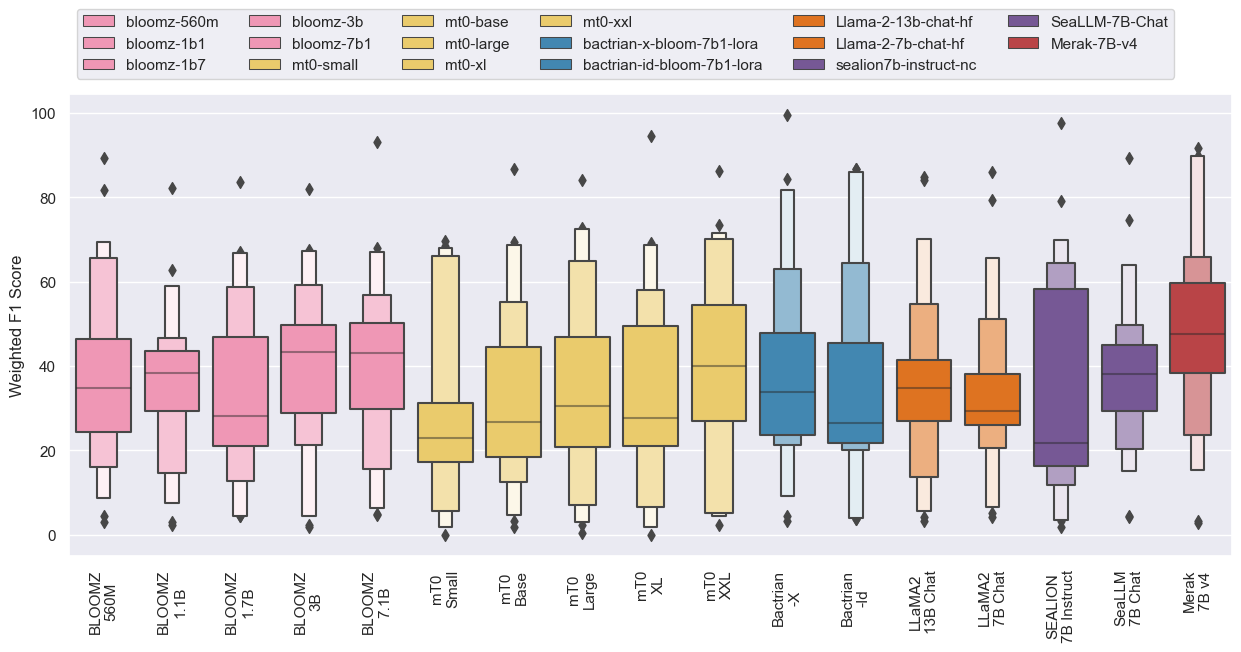

In [84]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf.sort_values('model_id')
sns.boxenplot(data=pdf, x='model_name', y='weighted_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_baseline.pdf', bbox_inches='tight')
plt.show()

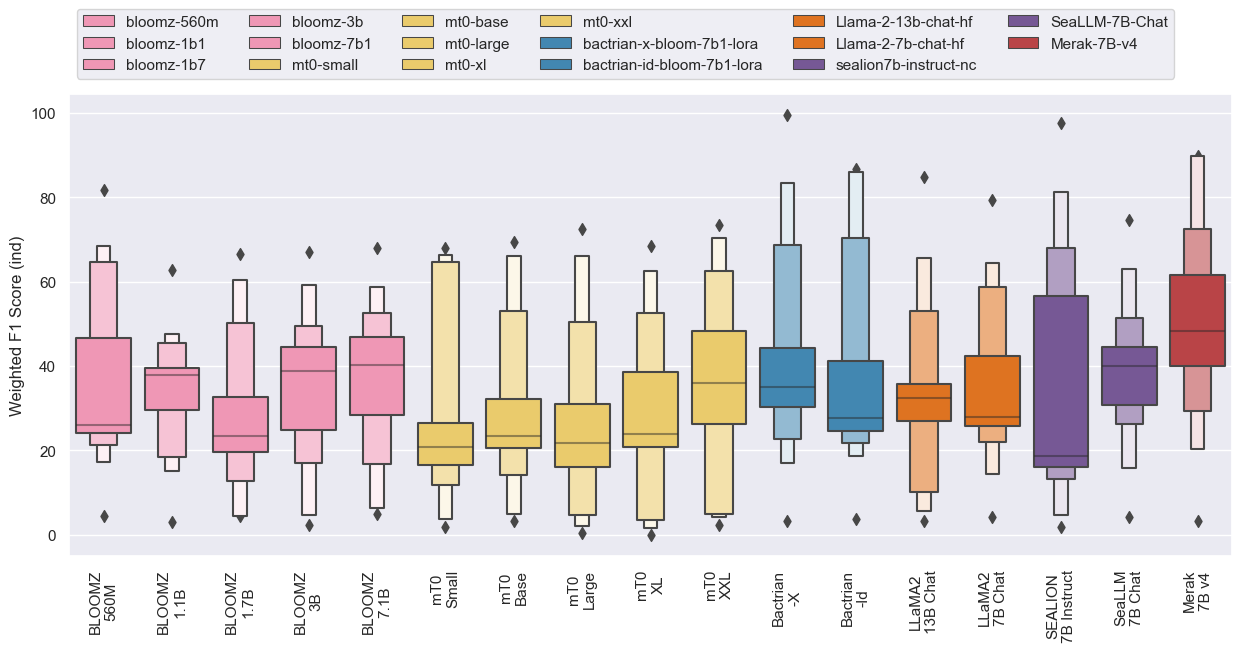

In [85]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
sns.boxenplot(data=pdf, x='model_name', y='weighted_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_ind_baseline.pdf', bbox_inches='tight')
plt.show()

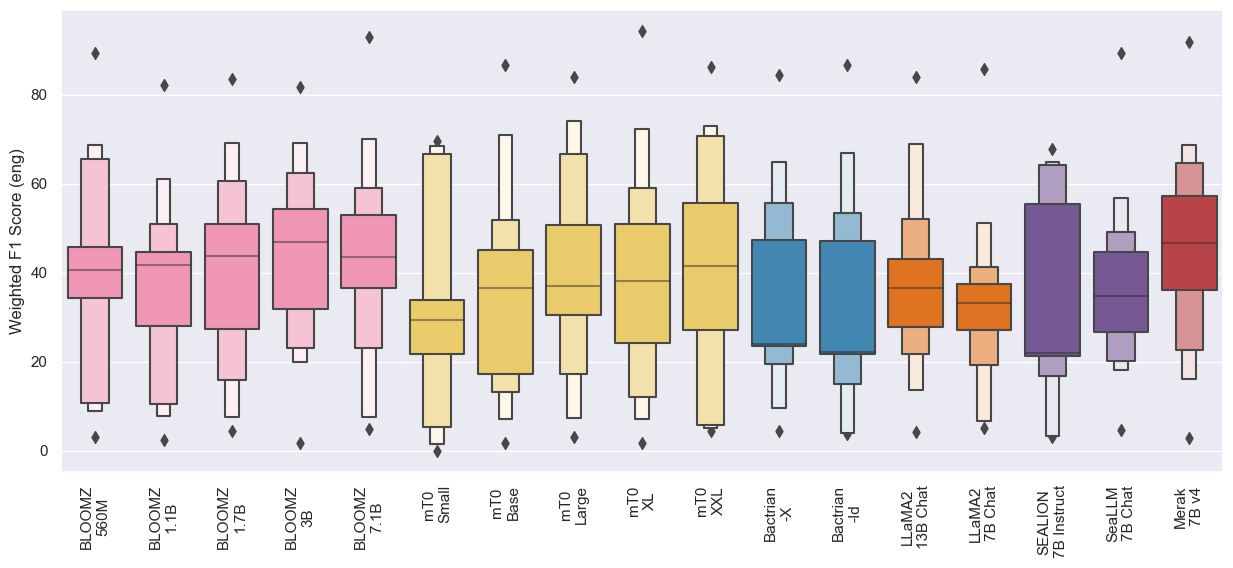

In [86]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[~pdf['model'].str.contains('cendol')]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax= sns.boxenplot(data=pdf, x='model_name', y='weighted_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_eng_baseline.pdf', bbox_inches='tight')
plt.show()

# NLU SCORE OVERALL

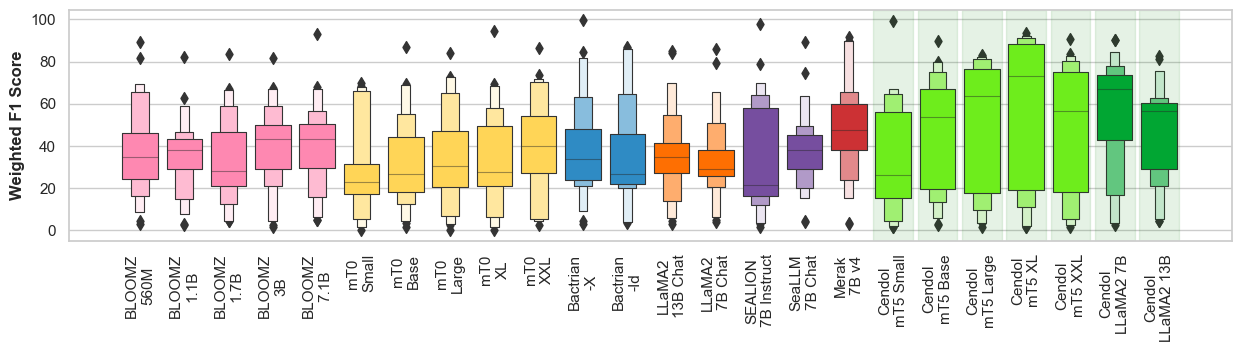

In [87]:
# With Cendol
sns.set(rc={'figure.figsize':(15,3)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf.sort_values('model_id')
ax = sns.boxenplot(data=(pdf), x='model_name', y='weighted_f1_score',
                   hue='model', k_depth=3, dodge=False, palette=model_to_color.values(),
                   saturation=1,
                   linewidth=0.8,
)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score.pdf', bbox_inches='tight')
plt.show()

In [88]:
model_to_color

{'bloomz-560m': '#fe88b1',
 'bloomz-1b1': '#fe88b1',
 'bloomz-1b7': '#fe88b1',
 'bloomz-3b': '#fe88b1',
 'bloomz-7b1': '#fe88b1',
 'mt0-small': '#ffd557',
 'mt0-base': '#ffd557',
 'mt0-large': '#ffd557',
 'mt0-xl': '#ffd557',
 'mt0-xxl': '#ffd557',
 'bactrian-x-bloom-7b1-lora': '#2f8bc4',
 'bactrian-id-bloom-7b1-lora': '#2f8bc4',
 'Llama-2-13b-chat-hf': '#fe6f02',
 'Llama-2-7b-chat-hf': '#fe6f02',
 'sealion7b-instruct-nc': '#764e9f',
 'SeaLLM-7B-Chat': '#764e9f',
 'Merak-7B-v4': '#cc3134',
 'cendol-mt5-small': '#7bfa20',
 'cendol-mt5-base': '#7bfa20',
 'cendol-mt5-large': '#7bfa20',
 'cendol-mt5-xl': '#7bfa20',
 'cendol-mt5-xxl-merged': '#7bfa20',
 'cendol-llama2-7b': '#02ab39',
 'cendol-llama2-13b-merged': '#02ab39',
 'cendol-mt5-small-chat': '#73af48',
 'cendol-mt5-base-chat': '#73af48',
 'cendol-mt5-large-chat': '#73af48',
 'cendol-mt5-xl-chat': '#73af48',
 'cendol-mt5-xxl-merged-chat': '#73af48',
 'cendol-llama2-7b-chat': '#117733',
 'cendol-llama2-13b-merged-chat': '#117733'}

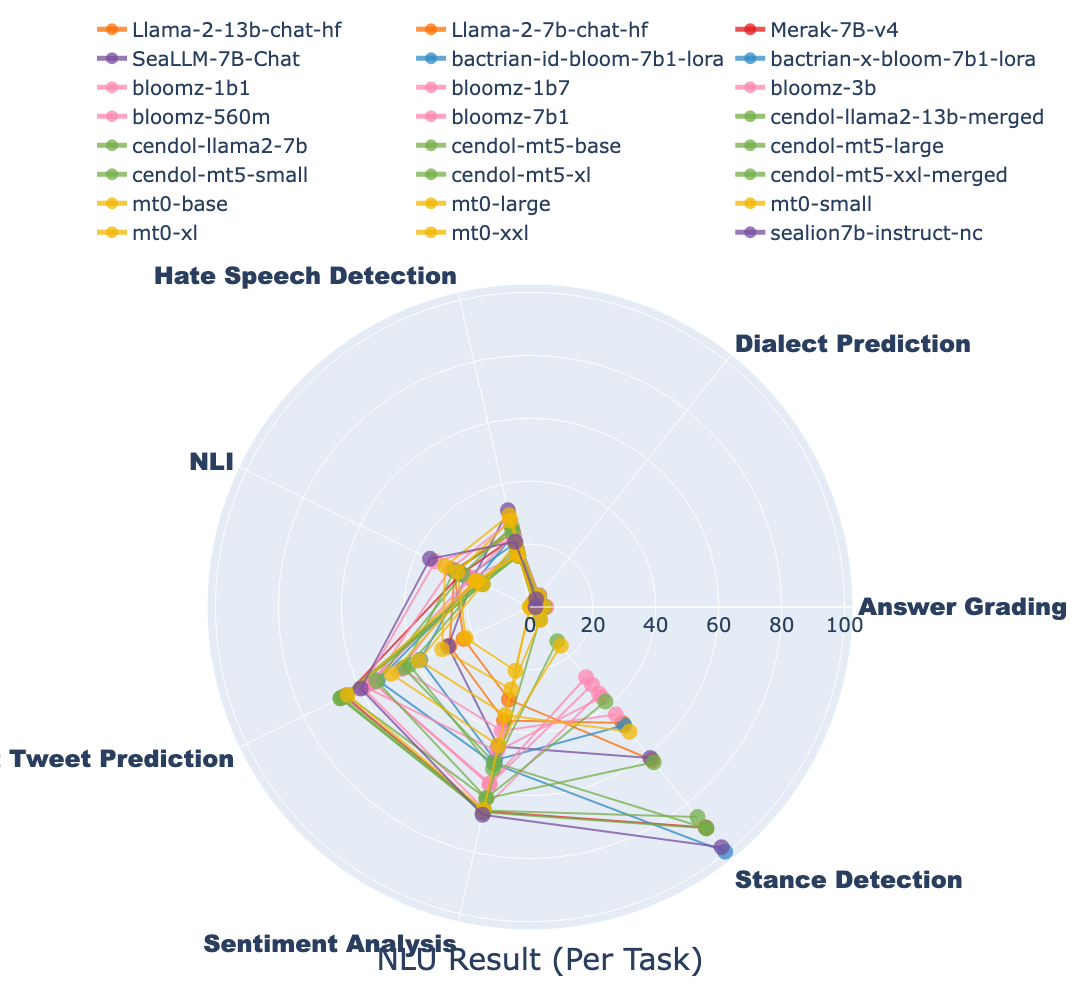

In [89]:
import plotly.graph_objects as go

DATASET_TO_TASK_MAPPING = {
    "code_mixed_jv_id_jv_nusantara_text": "Sentiment Analysis",
    "id_google_play_review_nusantara_text": "Sentiment Analysis",
    "id_google_play_review_posneg_nusantara_text": "Sentiment Analysis",
    "id_hsd_nofaaulia_nusantara_text": "Hate Speech Detection",
    "id_short_answer_grading_nusantara_pairs_score": "Answer Grading",
    "id_stance_nusantara_pairs": "Stance Detection",
    "indolem_ntp_nusantara_pairs": "Next Tweet Prediction",
    "jadi_ide_nusantara_text": "Dialect Prediction",
    "nusax_senti_ace_nusantara_text": "Sentiment Analysis",
    "nusax_senti_ban_nusantara_text": "Sentiment Analysis",
    "nusax_senti_bjn_nusantara_text": "Sentiment Analysis",
    "nusax_senti_bug_nusantara_text": "Sentiment Analysis",
    "nusax_senti_mad_nusantara_text": "Sentiment Analysis",
    "nusax_senti_nij_nusantara_text": "Sentiment Analysis",
    "wrete_nusantara_pairs": "NLI"
}

MODEL_TO_COLOR_MAPPING = {
    'Llama-2-13b-chat-hf': 'rgba(254, 111, 2, 0.75)',
    'Llama-2-7b-chat-hf': 'rgba(254, 111, 2, 0.75)',
    'Merak-7B-v4': 'rgba(228, 26, 28, 0.75)',
    'SeaLLM-7B-Chat': 'rgba(118, 78, 159, 0.75)',
    'bactrian-id-bloom-7b1-lora': 'rgba(47, 138, 196, 0.75)',
    'bactrian-x-bloom-7b1-lora': 'rgba(47, 138, 196, 0.75)',
    'bloomz-1b1': 'rgba(254, 136, 177, 0.75)',
    'bloomz-1b7': 'rgba(254, 136, 177, 0.75)',
    'bloomz-3b': 'rgba(254, 136, 177, 0.75)',
    'bloomz-560m': 'rgba(254, 136, 177, 0.75)',
    'bloomz-7b1': 'rgba(254, 136, 177, 0.75)',
    'cendol-llama2-13b-merged': 'rgba(115, 175, 72, 0.75)',
    'cendol-llama2-7b': 'rgba(115, 175, 72, 0.75)',
    'cendol-mt5-base': 'rgba(115, 175, 72, 0.75)',
    'cendol-mt5-large': 'rgba(115, 175, 72, 0.75)',
    'cendol-mt5-small': 'rgba(115, 175, 72, 0.75)',
    'cendol-mt5-xl': 'rgba(115, 175, 72, 0.75)',
    'cendol-mt5-xxl-merged': 'rgba(115, 175, 72, 0.75)',
    'mt0-base': 'rgba(242, 183, 1, 0.75)',
    'mt0-large': 'rgba(242, 183, 1, 0.75)',
    'mt0-small': 'rgba(242, 183, 1, 0.75)',
    'mt0-xl': 'rgba(242, 183, 1, 0.75)',
    'mt0-xxl': 'rgba(242, 183, 1, 0.75)',
    'sealion7b-instruct-nc': 'rgba(118, 78, 159, 0.75)',
}

MODEL_TO_MODELFAM_MAPPING = {
    'Llama-2-13b-chat-hf': 'Llama2 Chat',
    'Llama-2-7b-chat-hf': 'Llama2 Chat',
    'Merak-7B-v4': 'Indonesian LLM',
    'SeaLLM-7B-Chat': 'SEA LLM',
    'bactrian-id-bloom-7b1-lora': 'Bactrian',
    'bactrian-x-bloom-7b1-lora': 'Bactrian',
    'bloomz-1b1': 'BLOOMZ',
    'bloomz-1b7': 'BLOOMZ',
    'bloomz-3b': 'BLOOMZ',
    'bloomz-560m': 'BLOOMZ',
    'bloomz-7b1': 'BLOOMZ',
    'cendol-llama2-13b-merged': 'Cendol',
    'cendol-llama2-7b': 'Cendol',
    'cendol-mt5-base': 'Cendol',
    'cendol-mt5-large': 'Cendol',
    'cendol-mt5-small': 'Cendol',
    'cendol-mt5-xl': 'Cendol',
    'cendol-mt5-xxl-merged': 'Cendol',
    'mt0-base': 'mT0',
    'mt0-large': 'mT0',
    'mt0-small': 'mT0',
    'mt0-xl': 'mT0',
    'mt0-xxl': 'mT0',
    'sealion7b-instruct-nc': 'SEA LLM',
}

# pdf["task"] = [DATASET_TO_TASK_MAPPING[pdf["dataset"][i]] for i in range(len(pdf))]
tasks = []
for i in range(len(pdf)):
    dataset = pdf.iloc[i]["dataset"]
    tasks += [DATASET_TO_TASK_MAPPING[dataset]]
pdf["task"] = tasks

pdf = pdf.sort_values(['task', 'model'])
categories = pdf["task"].unique()

fig = go.Figure()

for model in pdf["model"].unique():
    fig.add_trace(go.Scatterpolar(
        r=pdf[pdf["model"] == model]["weighted_f1_score"],
        theta=categories,
        fill='toself',
        fillcolor="rgba(60, 59, 95, 0)",
        line_color=MODEL_TO_COLOR_MAPPING[model],
        marker=dict(symbol="circle-dot"),
        name=model,
    ))

fig.update_traces(mode = "lines+markers",
    marker = dict(
        size = 16
    ))

fig.update_layout(
  polar=dict(
      radialaxis_tickfont_size = 20,
    radialaxis=dict(
      visible=True,
      # range=[0.75, 0.95],
       # tickformat = '.0000%'
    ), angularaxis = dict(
        tickfont_size=24, tickfont_family="Arial Black",
        rotation=0, # start position of angular axis
        # direction="counterclockwise"
      )),
    legend=dict(
        font=dict(size=20),
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="right",
        x=1,
        title="",
        itemsizing="constant",
    ),
    margin=dict(l=10, r=30, t=70, b=70),
    height=1000, width=1000, title_text="NLU Result (Per Task)", title_font_size=30,
    title_xanchor='center', title_yanchor="bottom", title_x=0.5, title_y=0.03
)

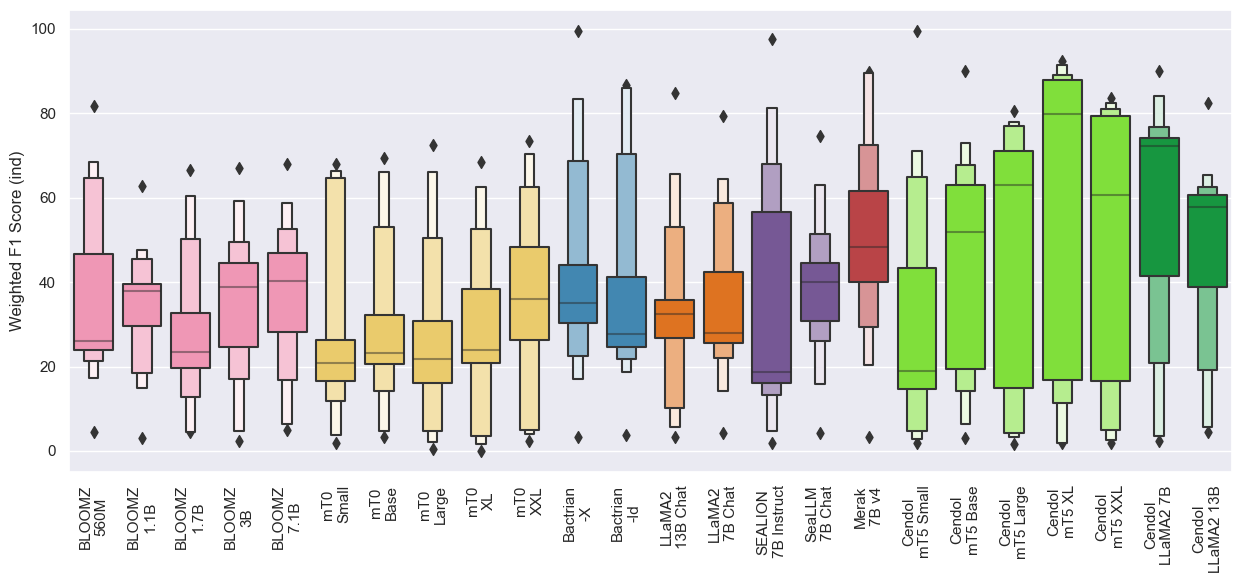

In [90]:
# With Cendol
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='weighted_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

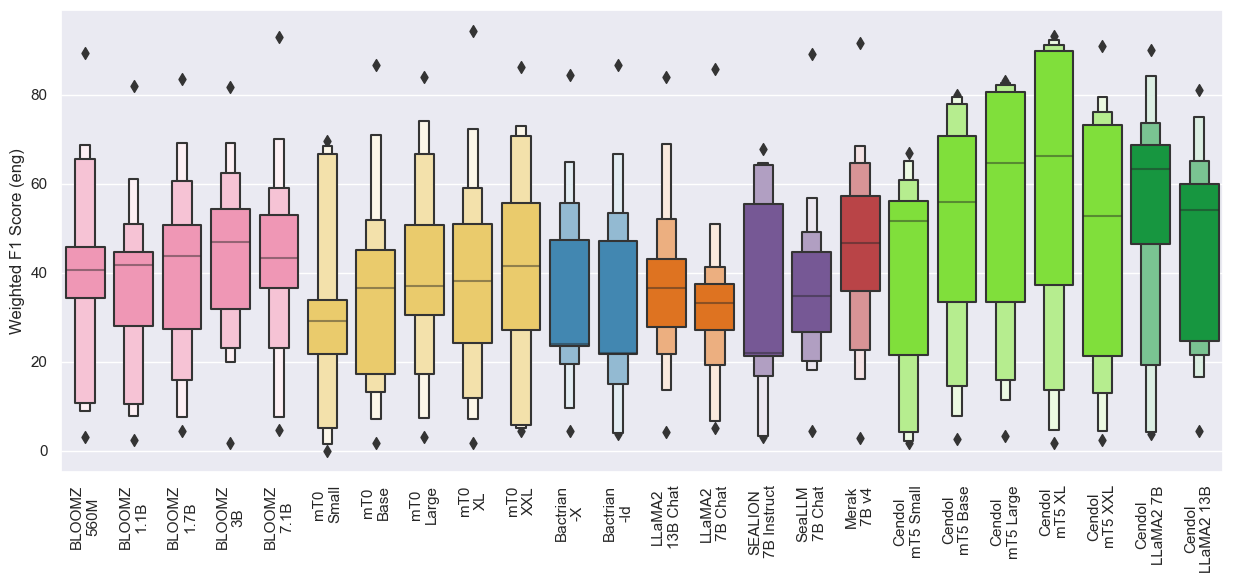

In [91]:
# With Cendol
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='weighted_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

# Other Metrics

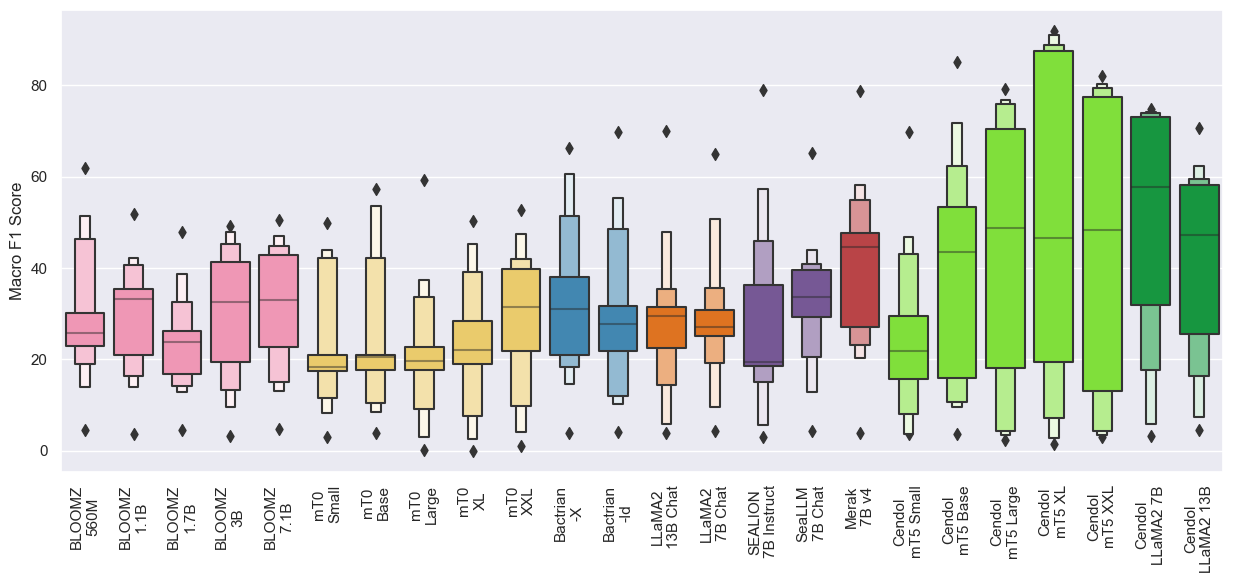

In [92]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='macro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Macro F1 Score')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score.pdf', bbox_inches='tight')
plt.show()

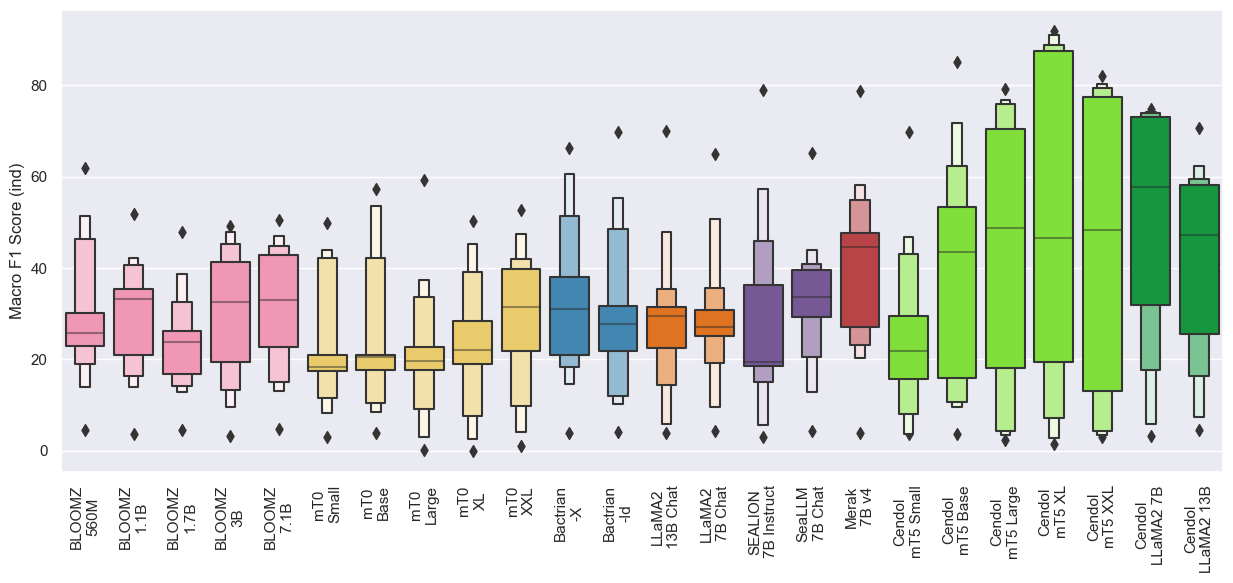

In [93]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='macro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Macro F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

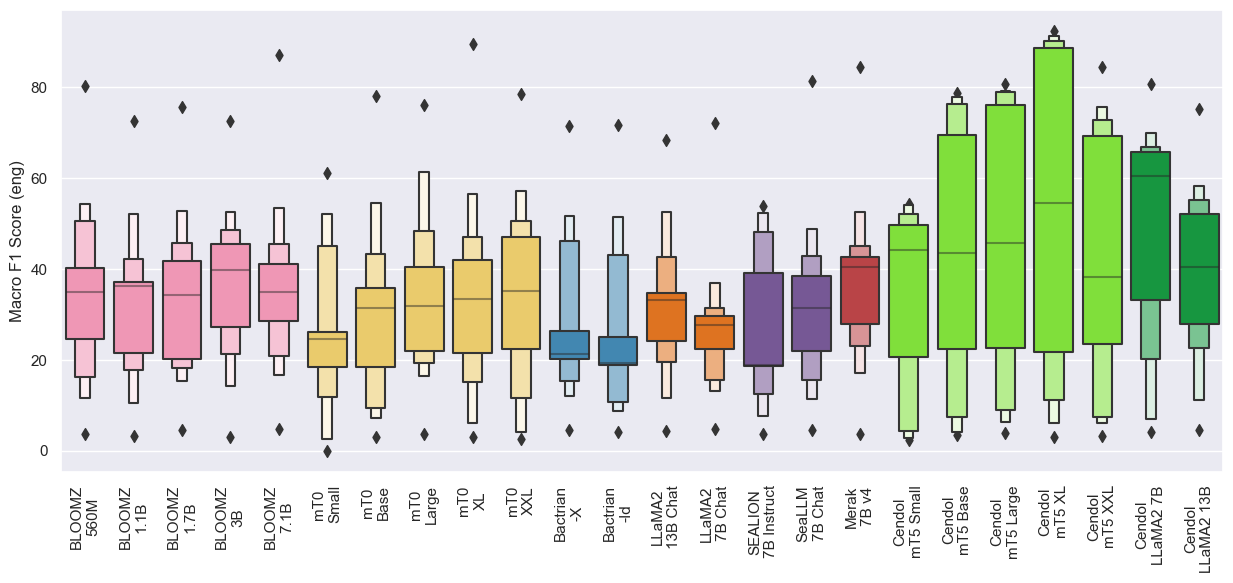

In [94]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='macro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Macro F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

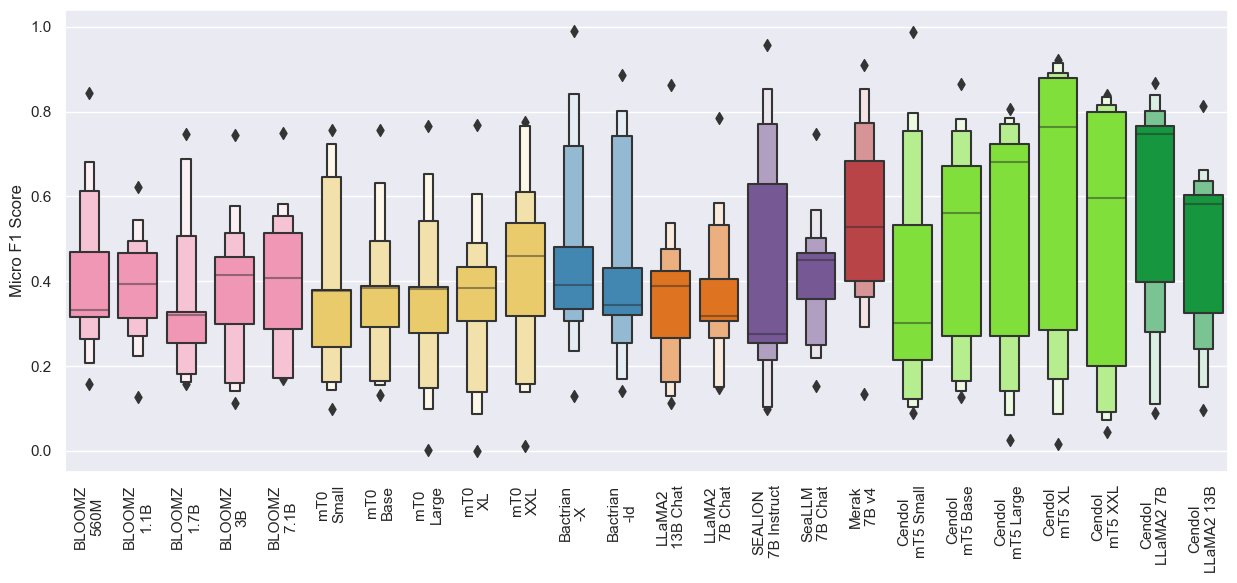

In [95]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='micro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Micro F1 Score')
plt.xlabel(None)
plt.savefig('./figures/micro_f1_score.pdf', bbox_inches='tight')
plt.show()

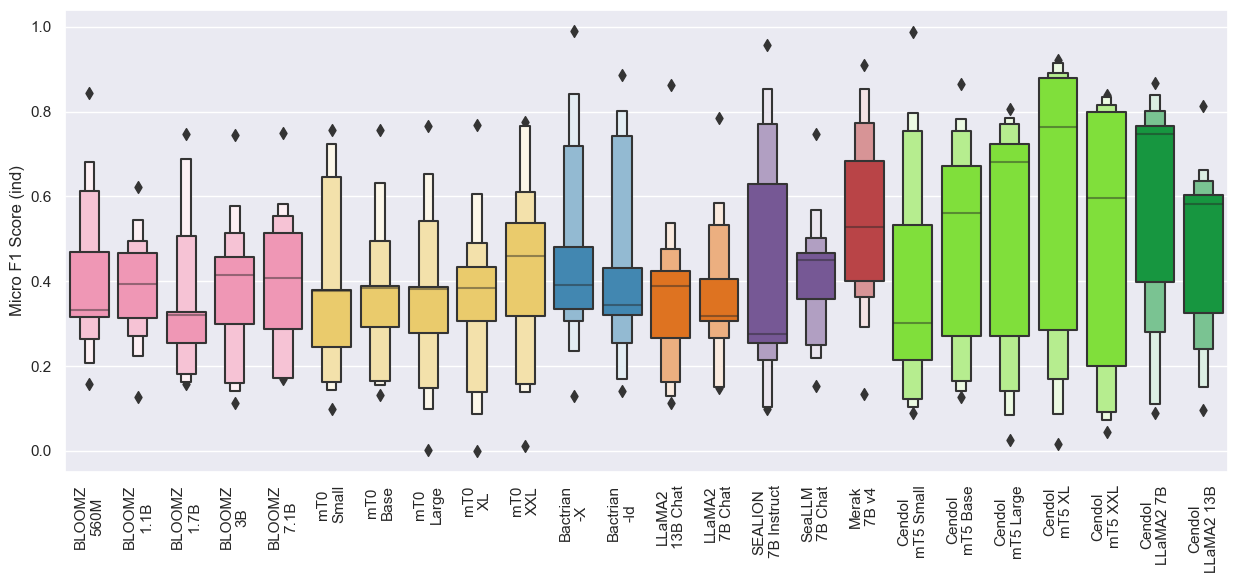

In [96]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='micro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Micro F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/micro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

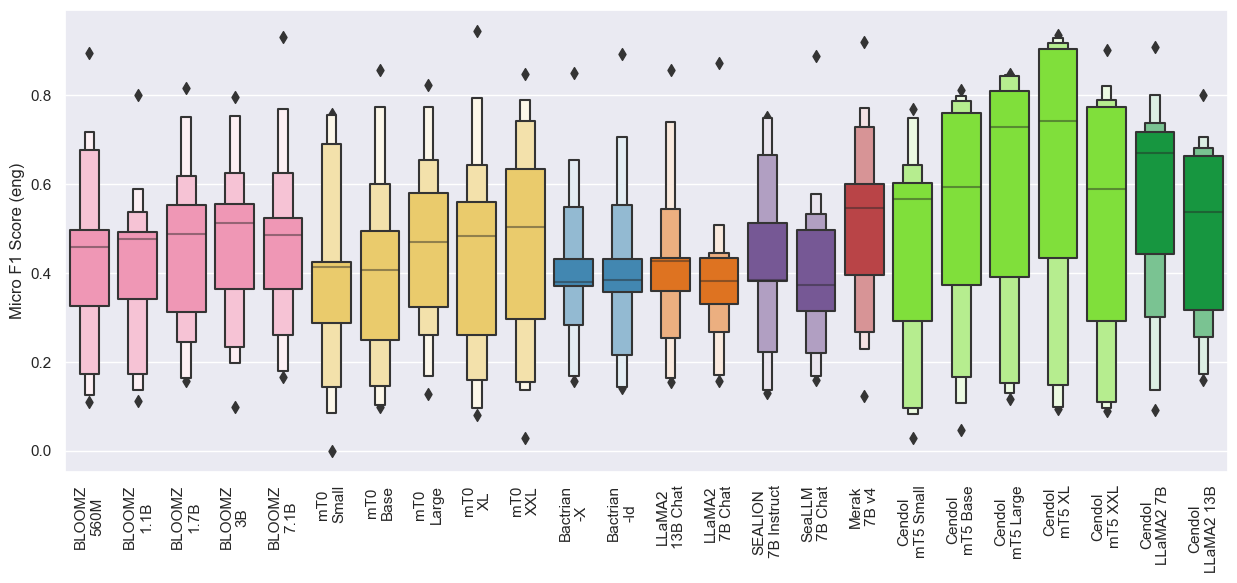

In [97]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='micro_f1_score', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Micro F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/micro_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

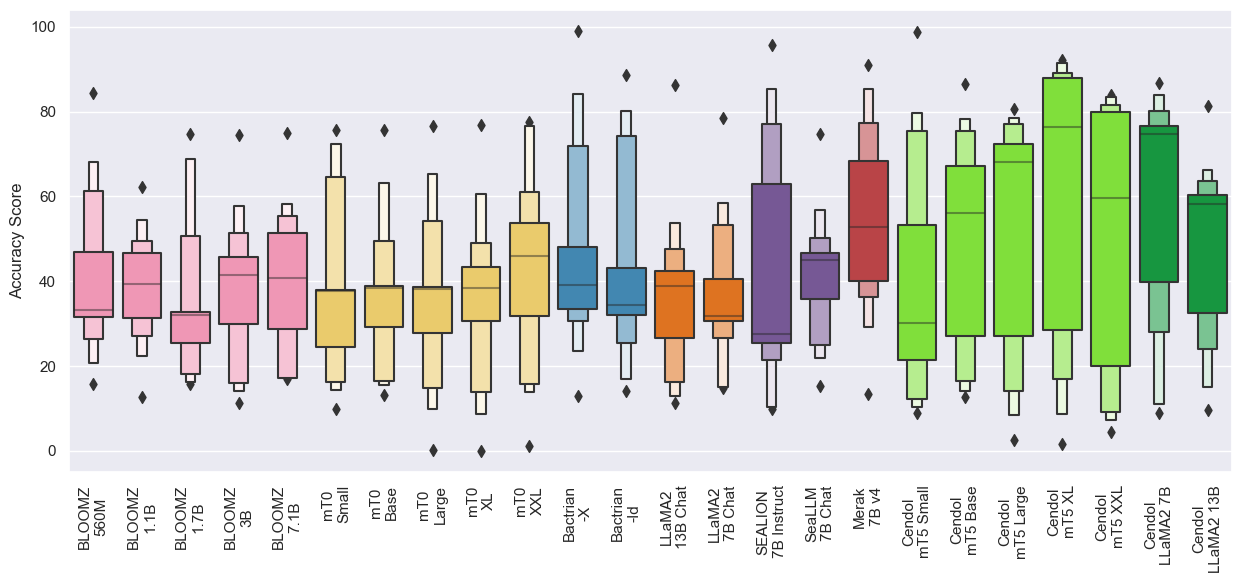

In [98]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score')
plt.xlabel(None)
plt.savefig('./figures/accuracy.pdf', bbox_inches='tight')
plt.show()

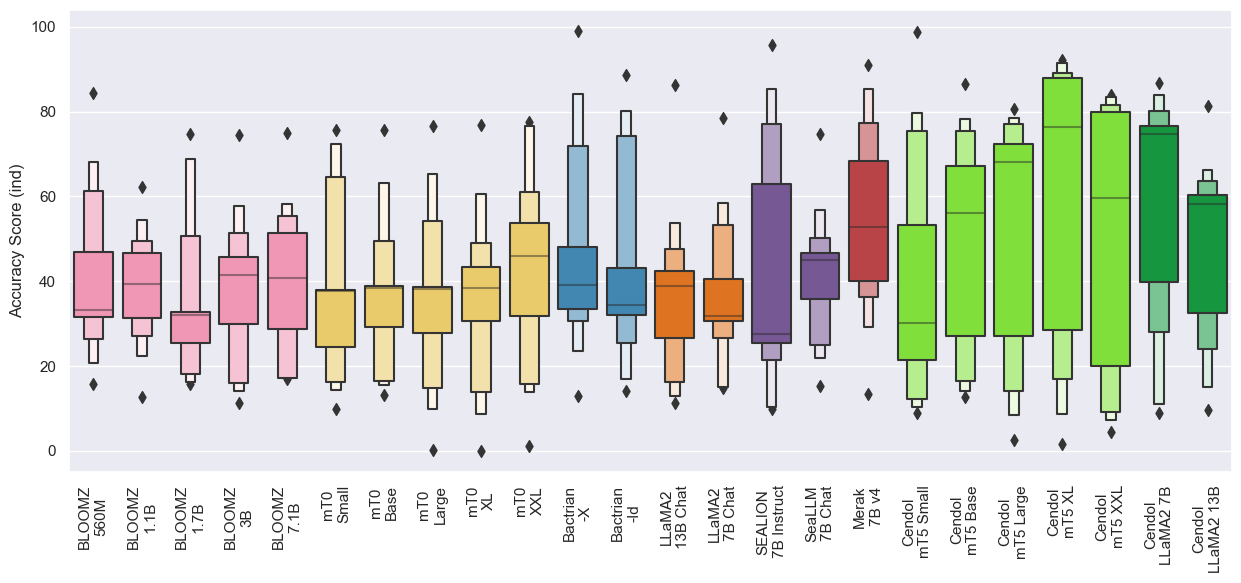

In [99]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/accuracy_ind.pdf', bbox_inches='tight')
plt.show()

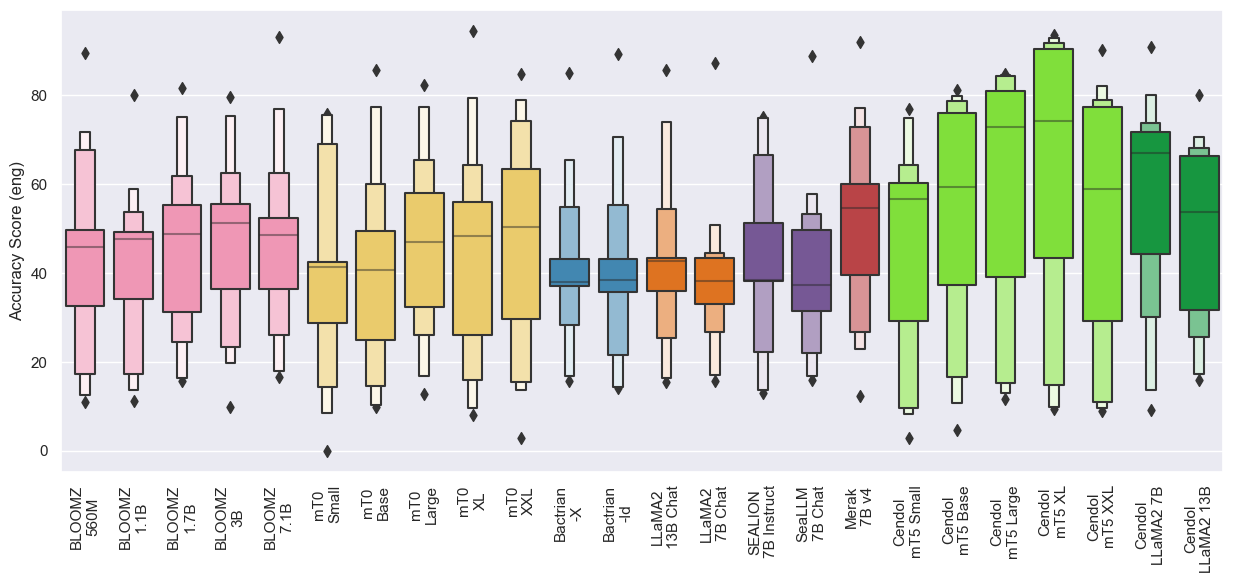

In [100]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='accuracy', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/accuracy_eng.pdf', bbox_inches='tight')
plt.show()

# NLG (SCORE PER TASK)

In [101]:
dfs = []
for path in glob.glob('metrics_nlg/*.csv'):
    model = path[:-4].split('_')[-1]
    if model == 'sealion7b':
        continue
    elif "vocab" in model:
        continue
    elif model == "old":
        continue
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['BLEU'] = df['BLEU'].astype(float)
    df['SacreBLEU'] = df['SacreBLEU'].astype(float)
    df['chrF++'] = df['chrF++'].astype(float)
    df['ROUGE1'] = df['ROUGE1'].astype(float)
    df['ROUGE2'] = df['ROUGE2'].astype(float)
    df['ROUGEL'] = df['ROUGEL'].astype(float)
    df['ROUGELsum'] = df['ROUGELsum'].astype(float)
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)
df = df[df['dataset'] != 'xpersona_id_nusantara_t2t']

In [102]:
df[df['model'].str.contains('cendol')].to_csv('combine_nlg.csv')

In [103]:
df[(df['lang'] == 'ind')].groupby(['model','lang'])[['SacreBLEU','ROUGE1', 'ROUGE2', 'ROUGEL','chrF++']].mean().sort_values(['model','SacreBLEU'])

,,SacreBLEU,ROUGE1,ROUGE2,ROUGEL,chrF++
model,lang,,,,,
Llama-2-13b-chat-hf,ind,3.491855,17.408252,6.397490,16.070944,31.748986
Llama-2-7b-chat-hf,ind,2.855489,14.940335,5.464974,13.984853,29.982405
Merak-7B-v4,ind,2.754213,15.345768,4.218233,13.590762,28.776106
SeaLLM-7B-Chat,ind,3.222374,18.395567,5.903341,16.256607,32.251991
bactrian-id-bloom-7b1-lora,ind,2.512010,14.968249,4.749311,13.523019,26.941885
bactrian-x-bloom-7b1-lora,ind,1.043114,9.106870,2.397877,8.151451,22.771275
bloomz-1b1,ind,3.687485,14.283274,4.299907,13.150481,23.435741
bloomz-1b7,ind,4.278578,13.089773,4.583733,12.221784,21.904319
bloomz-3b,ind,5.823659,17.926600,6.533066,16.704965,26.202500


In [104]:
df[(df['lang'] == 'eng')].groupby(['model','lang'])[['SacreBLEU','ROUGE1', 'ROUGE2', 'ROUGEL','chrF++']].mean().sort_values(['model','SacreBLEU'])

,,SacreBLEU,ROUGE1,ROUGE2,ROUGEL,chrF++
model,lang,,,,,
Llama-2-13b-chat-hf,eng,1.831031,9.172567,3.244235,8.687830,24.844185
Llama-2-7b-chat-hf,eng,1.911577,10.150166,3.578563,9.771467,25.572762
Merak-7B-v4,eng,3.145723,16.098953,4.697591,14.358742,28.885337
SeaLLM-7B-Chat,eng,2.546884,15.001918,4.757914,13.497175,29.637783
bactrian-id-bloom-7b1-lora,eng,1.828950,10.260876,3.261739,9.552469,22.647129
bactrian-x-bloom-7b1-lora,eng,0.814679,6.063270,1.687972,5.596476,20.157295
bloomz-1b1,eng,4.145185,15.850170,4.941602,14.548177,24.360352
bloomz-1b7,eng,6.753898,19.686551,7.411420,18.570691,28.959221
bloomz-3b,eng,7.022884,19.892330,7.662295,18.663869,28.368598


# STIF

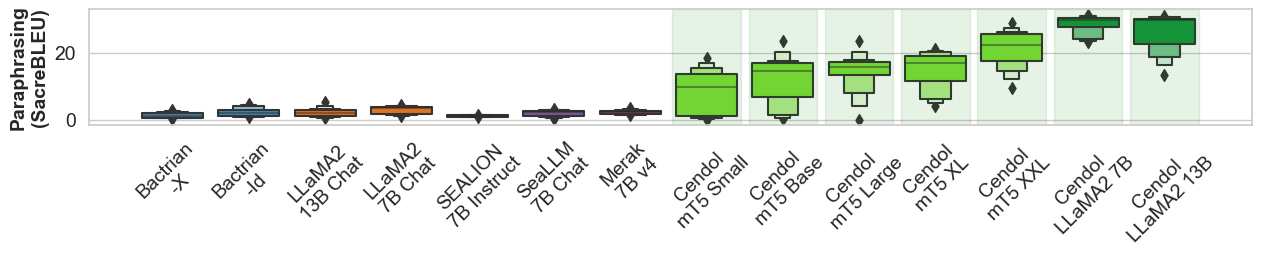

In [114]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'stif_indonesia_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf.sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)

n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)

ax.get_legend().set_visible(False)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Paraphrasing\n(SacreBLEU)', fontdict={'weight': 'bold'}, fontsize=14)
plt.xlabel(None)
# plt.xticks([], [])
plt.savefig('./figures/bleu_stif.pdf', bbox_inches='tight')
plt.show()

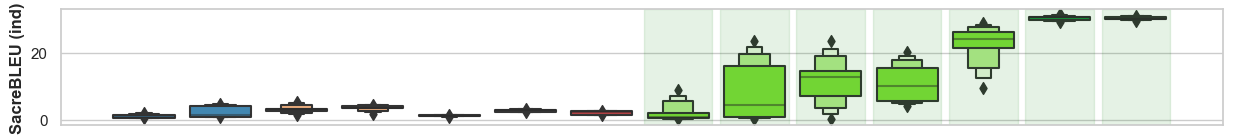

In [116]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'stif_indonesia_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_stif_ind.pdf', bbox_inches='tight')
plt.show()

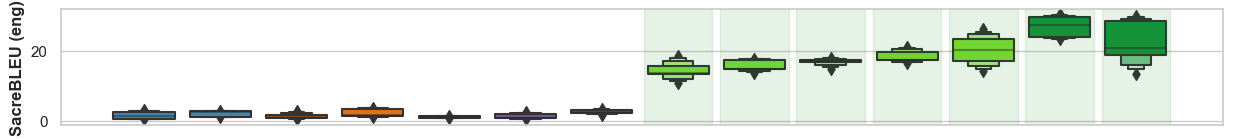

In [117]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'stif_indonesia_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_stif_eng.pdf', bbox_inches='tight')
plt.show()

# MT Directional

### To Ind

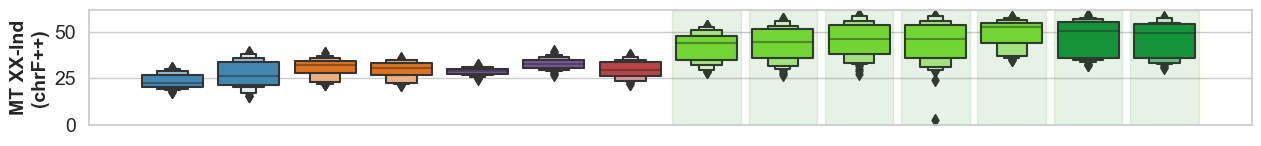

In [118]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.endswith('ind_Latn')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf.sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('MT XX-Ind\n(chrF++)', fontdict={'weight': 'bold'}, fontsize=14)
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2ind.pdf', bbox_inches='tight')
plt.show()

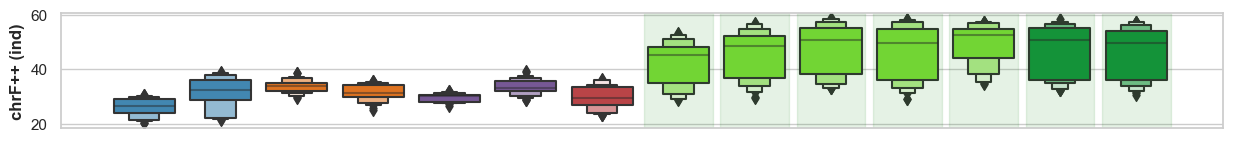

In [119]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.endswith('ind_Latn')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('chrF++ (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2ind_ind.pdf', bbox_inches='tight')
plt.show()

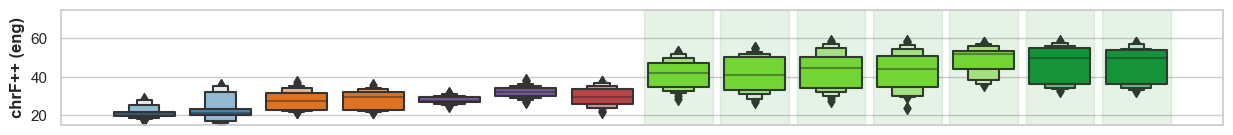

In [120]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.endswith('ind_Latn')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylim(15,75)
plt.ylabel('chrF++ (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2ind_eng.pdf', bbox_inches='tight')
plt.show()

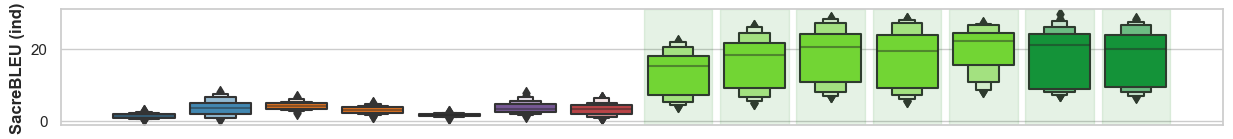

In [121]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.endswith('ind_Latn')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_mt2ind_ind.pdf', bbox_inches='tight')
plt.show()

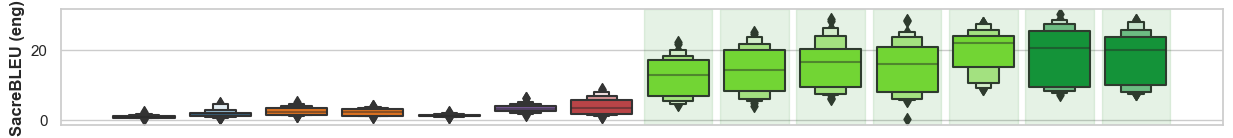

In [122]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.endswith('ind_Latn')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_mt2ind_eng.pdf', bbox_inches='tight')
plt.show()

### From Ind

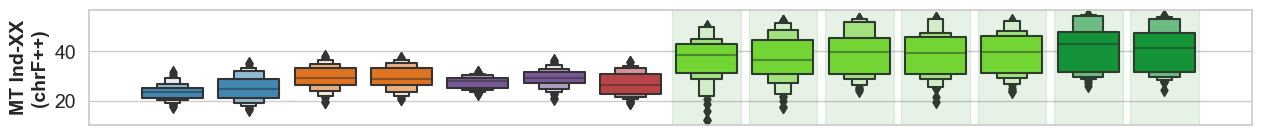

In [123]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.contains('-ind_Latn-')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf.sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('MT Ind-XX\n(chrF++)', fontdict={'weight': 'bold'}, fontsize=14)
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2oth.pdf', bbox_inches='tight')
plt.show()

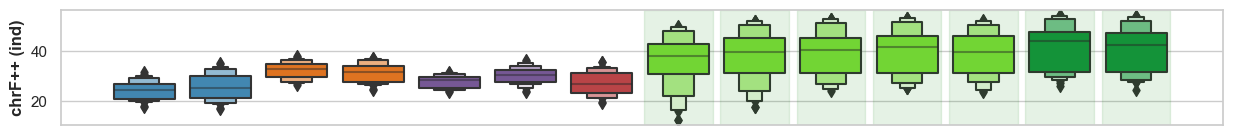

In [124]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.contains('-ind_Latn-')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('chrF++ (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2oth_ind.pdf', bbox_inches='tight')
plt.show()

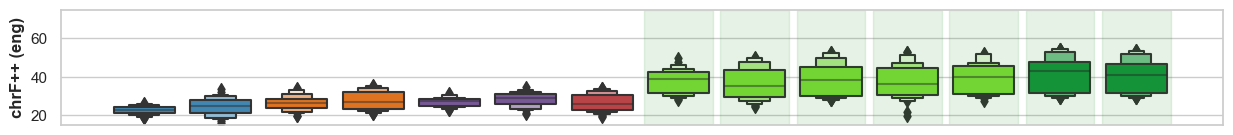

In [125]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.contains('-ind_Latn-')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylim(15,75)
plt.ylabel('chrF++ (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/chrf_mt2oth_eng.pdf', bbox_inches='tight')
plt.show()

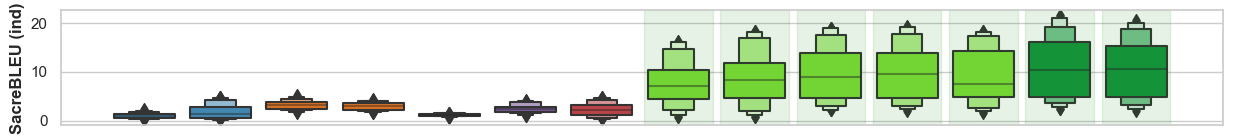

In [126]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.contains('-ind_Latn-')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_mt2oth_ind.pdf', bbox_inches='tight')
plt.show()

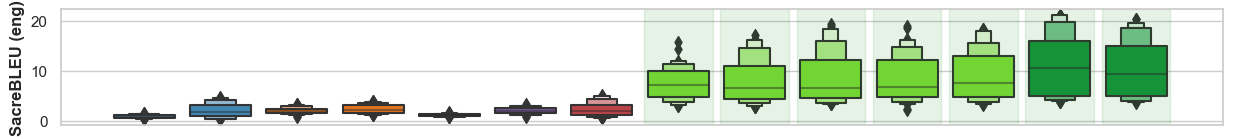

In [127]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'].str.contains('-ind_Latn-')]
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/bleu_mt2oth_eng.pdf', bbox_inches='tight')
plt.show()

## TydiQA

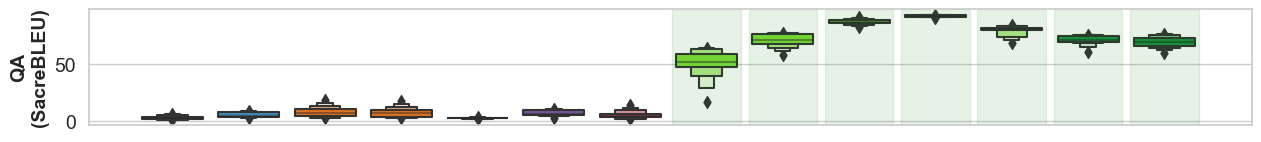

In [147]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'tydiqa_id_nusantara_qa']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf.sort_values('model_id')
          
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('QA\n(SacreBLEU)', fontdict={'weight': 'bold'}, fontsize=14)
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('sacrebleu_qa.pdf', bbox_inches='tight')
plt.show()

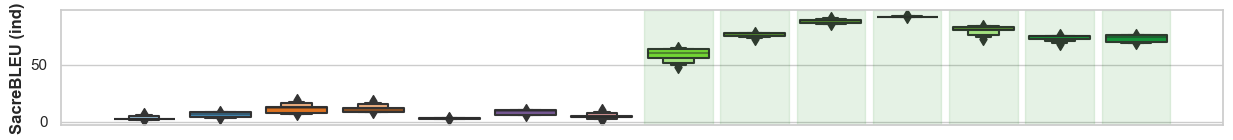

In [129]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'tydiqa_id_nusantara_qa']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
          
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('sacrebleu_qa_ind.pdf', bbox_inches='tight')
plt.show()

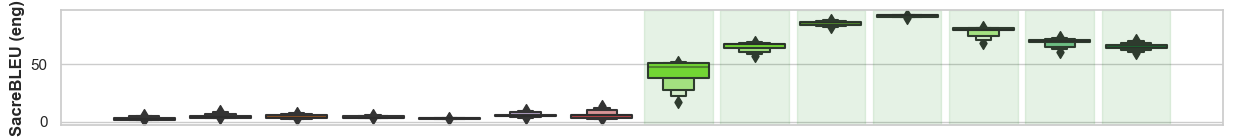

In [130]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'tydiqa_id_nusantara_qa']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')
          
ax = sns.boxenplot(data=pdf, x='model_name', y='SacreBLEU', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('SacreBLEU (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('sacrebleu_qa_eng.pdf', bbox_inches='tight')
plt.show()

# Summarization

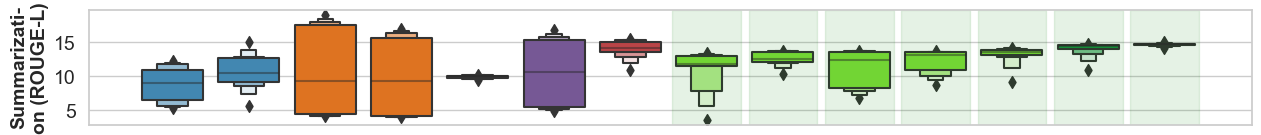

In [143]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'xl_sum_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf.sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='ROUGEL', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])
# sns.boxplot(pdf[(pdf['dataset'] == 'xl_sum_nusantara_t2t') & (pdf['lang'] == 'ind')].sort_values('model_id'), x='model', y='ROUGEL', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Summarizati-\non (ROUGE-L)', fontdict={'weight': 'bold'}, fontsize=14)
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/rougel_xlsum.pdf', bbox_inches='tight')
plt.show()

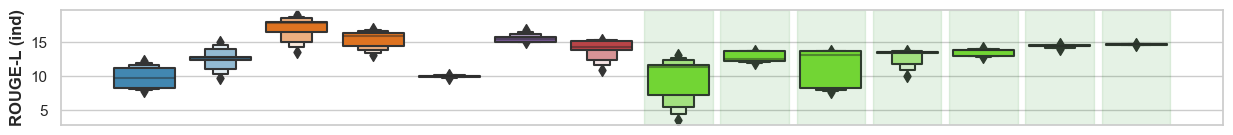

In [144]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'xl_sum_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='ROUGEL', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])
# ax = sns.boxenplot(pdf, x='model_name', y='ROUGEL', hue='model', k_depth=3, dodge=False, palette=model_to_color.values())
# sns.boxplot(pdf[(pdf['dataset'] == 'xl_sum_nusantara_t2t') & (pdf['lang'] == 'ind')].sort_values('model_id'), x='model', y='ROUGEL', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('ROUGE-L (ind)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/rougel_xlsum_ind.pdf', bbox_inches='tight')
plt.show()

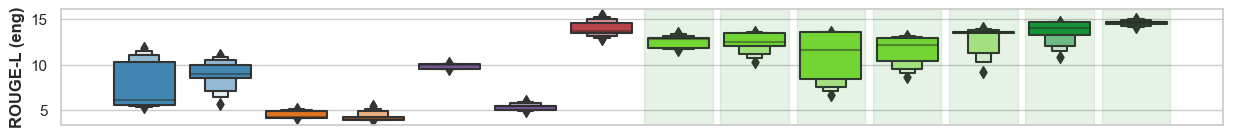

In [145]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf[pdf['dataset'] == 'xl_sum_nusantara_t2t']
pdf = pdf[(~pdf['model'].str.contains('chat')) | (~pdf['model'].str.contains('cendol'))]
pdf = pdf[(~pdf['model'].str.startswith('bloomz-')) & (~pdf['model'].str.startswith('mt0'))]
pdf = pdf[pdf['lang'] == 'eng'].sort_values('model_id')

ax = sns.boxenplot(data=pdf, x='model_name', y='ROUGEL', hue='model', k_depth=3, dodge=False, palette=list(model_to_color.values())[10:])
# sns.boxplot(pdf[(pdf['dataset'] == 'xl_sum_nusantara_t2t') & (pdf['lang'] == 'ind')].sort_values('model_id'), x='model', y='ROUGEL', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
n_model = len(pdf["model_name"].unique())
for i in range(n_model-7, n_model):
    ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)
    
ax.get_legend().set_visible(False)
plt.xticks(rotation=90)
plt.ylabel('ROUGE-L (eng)', fontdict={'weight': 'bold'})
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('./figures/rougel_xlsum_eng.pdf', bbox_inches='tight')
plt.show()

In [146]:
df.dataset.unique()

array(['korpus_nusantara_ind_jav_nusantara_t2t',
       'korpus_nusantara_ind_xdy_nusantara_t2t',
       'korpus_nusantara_ind_bug_nusantara_t2t',
       'korpus_nusantara_ind_sun_nusantara_t2t',
       'korpus_nusantara_ind_mad_nusantara_t2t',
       'korpus_nusantara_ind_bjn_nusantara_t2t',
       'korpus_nusantara_ind_tiociu_nusantara_t2t',
       'korpus_nusantara_jav_ind_nusantara_t2t',
       'korpus_nusantara_xdy_ind_nusantara_t2t',
       'korpus_nusantara_bug_ind_nusantara_t2t',
       'korpus_nusantara_sun_ind_nusantara_t2t',
       'korpus_nusantara_mad_ind_nusantara_t2t',
       'korpus_nusantara_bjn_ind_nusantara_t2t',
       'korpus_nusantara_tiociu_ind_nusantara_t2t',
       'stif_indonesia_nusantara_t2t', 'tydiqa_id_nusantara_qa',
       'xl_sum_nusantara_t2t', 'flores200-sun_Latn-ind_Latn',
       'flores200-jav_Latn-ind_Latn', 'flores200-bug_Latn-ind_Latn',
       'flores200-ace_Latn-ind_Latn', 'flores200-bjn_Latn-ind_Latn',
       'flores200-ban_Latn-ind_Latn', 'flor

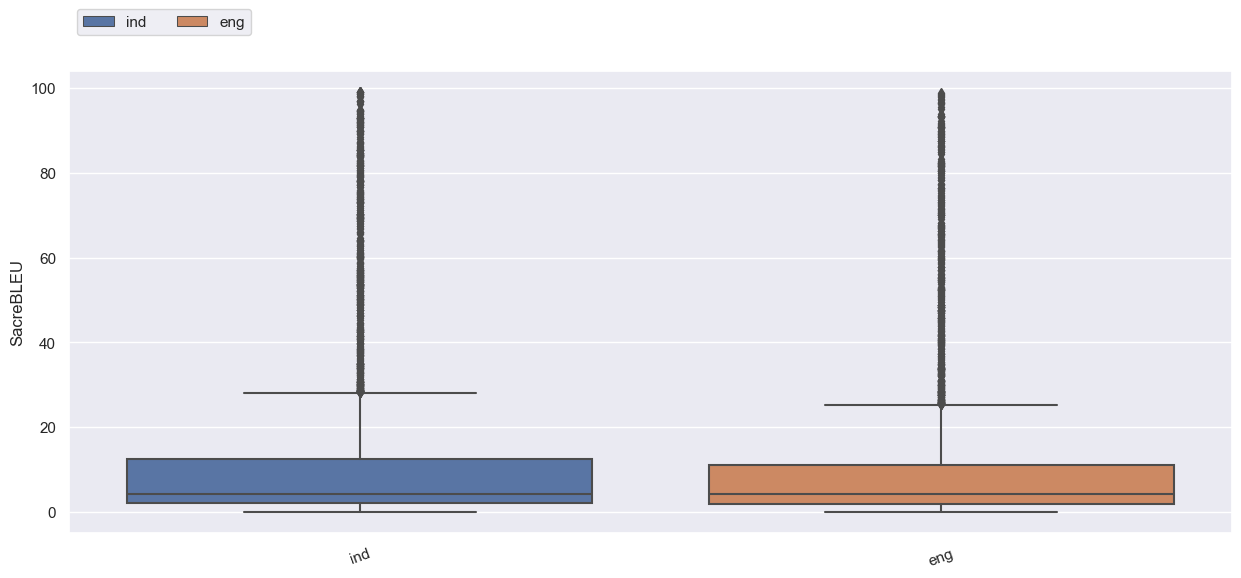

In [53]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(data=pdf.sort_values('model_id'), x='lang', y='SacreBLEU', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU')
plt.xlabel(None)
plt.savefig('./figures/sacrebleu_lang.pdf', bbox_inches='tight')
plt.show()

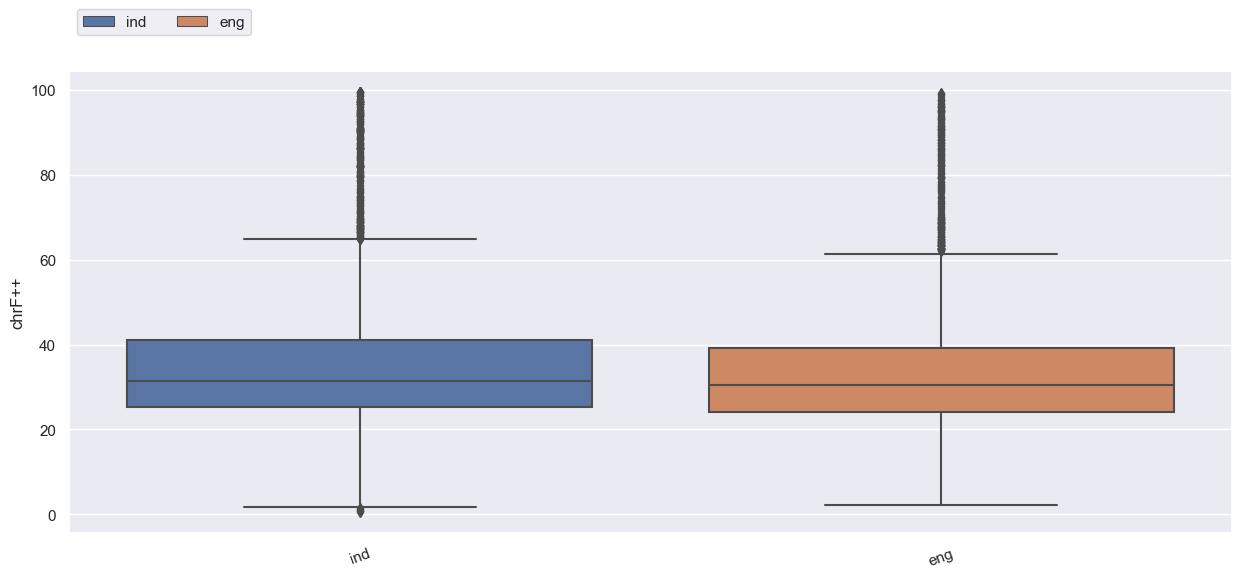

In [54]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(data=pdf.sort_values('model_id'), x='lang', y='chrF++', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++')
plt.xlabel(None)
plt.savefig('./figures/chrf_lang.pdf', bbox_inches='tight')
plt.show()

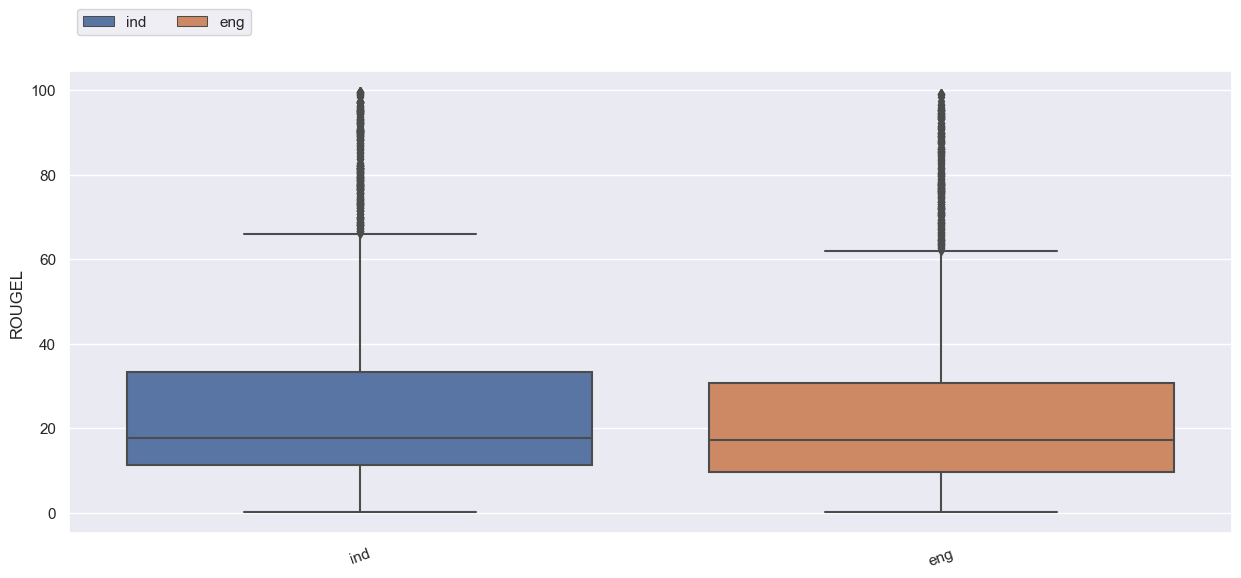

In [55]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(data=pdf.sort_values('model_id'), x='lang', y='ROUGEL', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('ROUGEL')
plt.xlabel(None)
plt.savefig('./figures/rougel_lang.pdf', bbox_inches='tight')
plt.show()

# Unseen Data Evaluation

In [56]:
nlu_unseen_data = [
       'wrete_nusantara_pairs',
       'id_google_play_review_nusantara_text',
       # 'emotion_id_opinion_nusantara_text',
       # 'id_abusive_news_comment_nusantara_text',
       # 'sentiment_nathasa_review_nusantara_text',
       'id_hsd_nofaaulia_nusantara_text',
       'code_mixed_jv_id_jv_nusantara_text',
       'id_google_play_review_posneg_nusantara_text',
]

nlu_unseen_tasks = [
       'id_short_answer_grading_nusantara_pairs_score',
       'id_stance_nusantara_pairs',
       'indolem_ntp_nusantara_pairs',
       'jadi_ide_nusantara_text',
]

nlu_unseen_langs = [
       'nusax_senti_ace_nusantara_text',
       'nusax_senti_ban_nusantara_text',
       'nusax_senti_bjn_nusantara_text',
       'nusax_senti_bug_nusantara_text',
       'nusax_senti_mad_nusantara_text',
       'nusax_senti_nij_nusantara_text',
]

In [57]:
dfs = []
for path in glob.glob('metrics_nlu/*.csv'):
    model = path[:-4].split('_')[-1]
    if model == 'sealion7b':
        continue
    elif "vocab" in model:
        continue
    elif model == "old":
        continue
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [58]:
(df.dataset.isin(nlu_unseen_data)).sum(), (df.dataset.isin(nlu_unseen_tasks)).sum(), (df.dataset.isin(nlu_unseen_langs)).sum()

(1550, 1240, 1860)

In [59]:
def eval_type(x):
    if x in nlu_unseen_data:
        return 'Unseen Data'
    if x in nlu_unseen_tasks:
        return 'Unseen Tasks'
    if x in nlu_unseen_langs:
        return 'Unseen Language'
df['eval_type'] = df['dataset'].apply(eval_type)

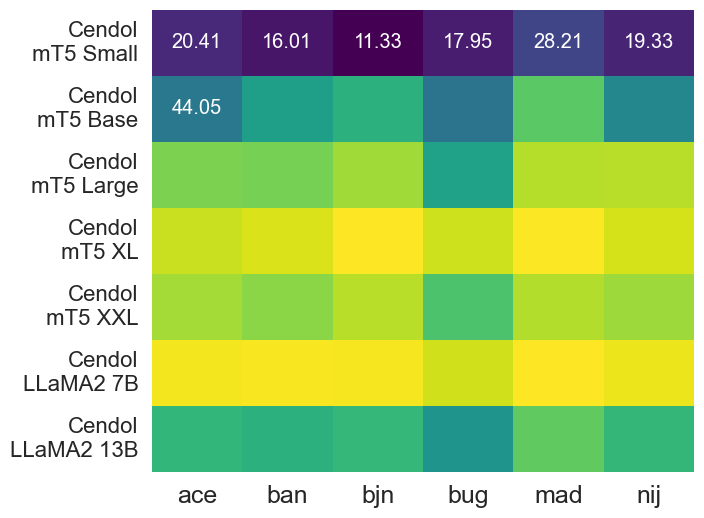

In [60]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set(font_scale=1.2)

pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].median().reset_index()
pdf = pdf[pdf['dataset'].isin(nlu_unseen_langs)]
pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('_')[2])

pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='weighted_f1_score').reset_index()
ax = sns.heatmap(pdf[['model_id', 'ace', 'ban', 'bjn', 'bug', 'mad', 'nij']].set_index('model_id'), annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], pdf['model_name'], rotation=0)
# plt.legend(loc='upper center',  ncols=7)
# # ax.get_legend().set_visible(False)
# plt.xticks(rotation=0, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=0, fontsize=18)
plt.ylabel(None)
plt.xlabel(None)
# plt.yticks(fontsize=16)
plt.savefig('./figures/unseen_lang_nlu.pdf', bbox_inches='tight')
plt.show()

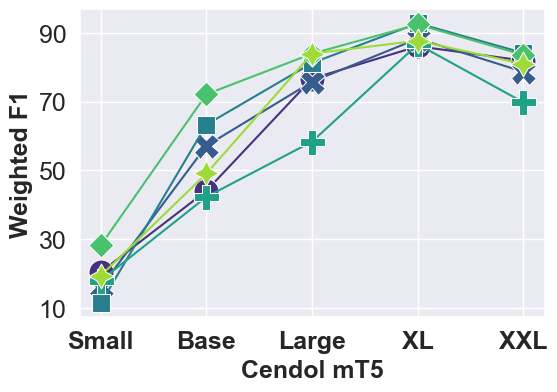

In [61]:
sns.set(rc={'figure.figsize':(6,4)})
# sns.set(font_scale=1.2)

# sns.set_theme(style="whitegrid", palette=None)

pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].median().reset_index()
pdf = pdf[pdf['dataset'].isin(nlu_unseen_langs)]
pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('_')[2])
# pdf = pdf[~("LLaMA2" in pdf['model_name'].str)]
pdf = pdf[(~pdf['model'].str.startswith('cendol-llama2'))]
pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='weighted_f1_score').reset_index()
pdf = pdf.melt(id_vars=["model_id", "model_name"], 
        var_name="lang", 
        value_name="weighted_f1_score")
pdf["model_name"] = pdf["model_name"].apply(lambda x: x.replace("Cendol\nmT5 ", ""))

ax = sns.lineplot(data=pdf,
             x="model_name", y="weighted_f1_score",
             hue="lang", style="lang",
             markers=True, dashes=False, markersize=18,
             palette="viridis", legend=False,
)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles, labels=labels)

plt.yticks(rotation=0, fontsize=18)
plt.xticks(rotation=0, fontsize=18, fontweight="bold")
plt.ylabel("Weighted F1", fontdict={"weight": "bold", "size": 18})
plt.xlabel("Cendol mT5", fontdict={"weight": "bold", "size": 18})
plt.yticks(np.arange(10, 100, 20))

plt.savefig('./figures/unseen_lang_nlu_cendol_mt5.pdf', bbox_inches='tight')

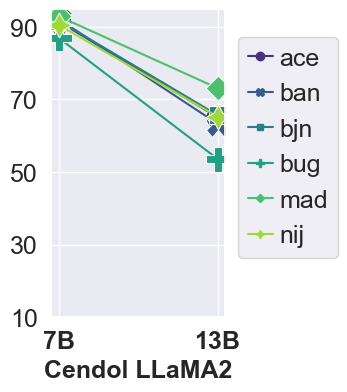

In [62]:
sns.set(rc={'figure.figsize':(2.25,4)})
# sns.set(font_scale=1.2)

# sns.set_theme(style="whitegrid", palette=None)

pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].median().reset_index()
pdf = pdf[pdf['dataset'].isin(nlu_unseen_langs)]
pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('_')[2])
# pdf = pdf[~("LLaMA2" in pdf['model_name'].str)]
pdf = pdf[(~pdf['model'].str.startswith('cendol-mt5'))]
pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='weighted_f1_score').reset_index()
pdf = pdf.melt(id_vars=["model_id", "model_name"], 
        var_name="lang", 
        value_name="weighted_f1_score")
pdf["model_name"] = pdf["model_name"].apply(lambda x: x.replace("Cendol\nLLaMA2 ", ""))

ax = sns.lineplot(data=pdf,
             x="model_name", y="weighted_f1_score",
             hue="lang", style="lang",
             markers=True, dashes=False, markersize=18,
             palette="viridis",
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, fontsize=18,
          handlelength=1, columnspacing=0.75, handletextpad=0.25,
        ncol=1,
          # loc='upper right',
          bbox_to_anchor=(1, 0.95),
         )

plt.yticks(rotation=0, fontsize=18)
plt.xticks(rotation=0, fontsize=18, fontweight="bold")
plt.ylabel(None)
# plt.ylabel("Weighted F1", fontdict={"weight": "bold"})
plt.xlabel("Cendol LLaMA2", fontdict={"weight": "bold", "size": 18})
plt.yticks(np.arange(10, 100, 20))
# plt.gca().get_yaxis().set_visible(False)

plt.savefig('./figures/unseen_lang_nlu_cendol_llama2.pdf', bbox_inches='tight')

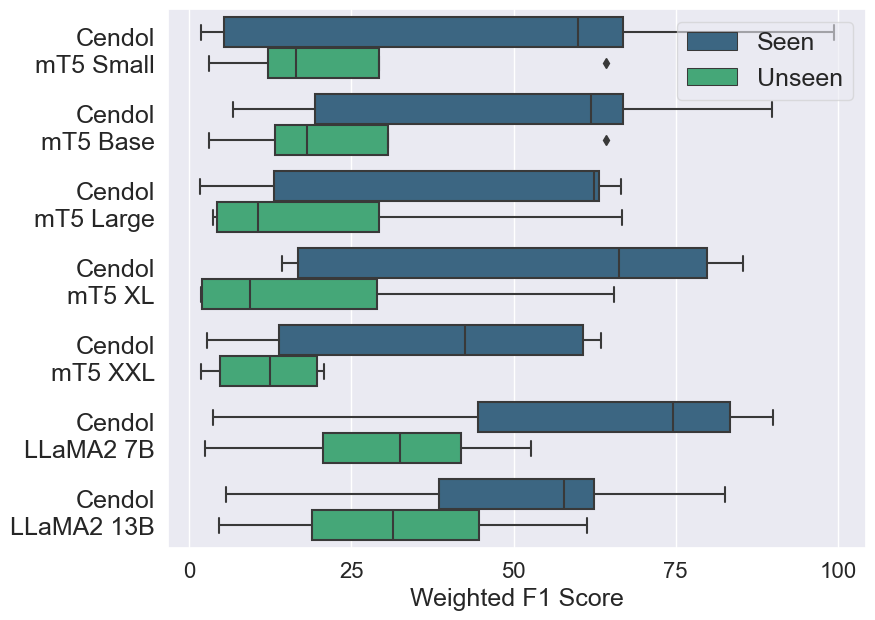

In [63]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set(font_scale=1.0)

pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['dataset'].isin(nlu_unseen_tasks + nlu_unseen_data)]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf['eval_type'] = pdf['eval_type'].apply(lambda x: x.replace('Unseen Data', 'Seen').replace('Unseen Tasks', 'Unseen'))
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxplot(data=pdf, y='model_name', x='weighted_f1_score', hue='eval_type', palette='viridis')
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(title='', loc='upper right', fontsize=18, framealpha=0.6)
# ax.get_legend().set_visible(False)
plt.yticks(rotation=0, fontsize=18)
plt.xticks([0, 25,50, 75, 100], rotation=0, fontsize=16)
plt.ylabel(None)
plt.xlabel('Weighted F1 Score', fontsize=18)
plt.savefig('./figures/unseen_tasks.pdf', bbox_inches='tight')
plt.show()

In [64]:
pdf["model"].unique()

array(['cendol-mt5-small', 'cendol-mt5-base', 'cendol-mt5-large',
       'cendol-mt5-xl', 'cendol-mt5-xxl-merged', 'cendol-llama2-7b',
       'cendol-llama2-13b-merged'], dtype=object)

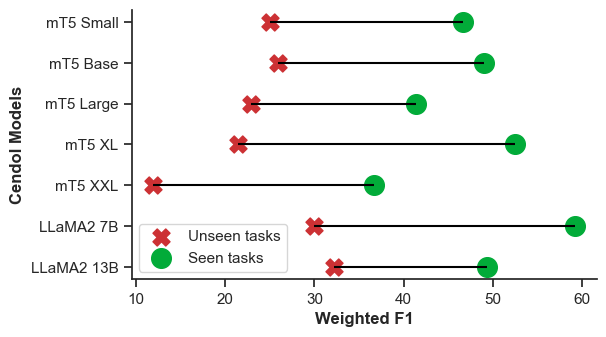

In [65]:
plt.figure(figsize=(6,3.5))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['dataset'].isin(nlu_unseen_tasks + nlu_unseen_data)]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf['eval_type'] = pdf['eval_type'].apply(lambda x: x.replace('Unseen Data', 'Seen').replace('Unseen Tasks', 'Unseen'))
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf = pdf.groupby(["model", "model_name", "eval_type"])["weighted_f1_score"].mean().reset_index()
pdf = pdf.sort_values(['model_name', 'eval_type'])
pdf['model_name'] = pdf['model_name'].apply(lambda x: x.replace("Cendol\n", ""))

custom_dict = {
    'cendol-mt5-small': 6,
    'cendol-mt5-base': 5,
    'cendol-mt5-large': 4,
    'cendol-mt5-xl': 3,
    'cendol-mt5-xxl-merged': 2,
    'cendol-llama2-7b': 1,
    'cendol-llama2-13b-merged': 0,
}
pdf = pdf.sort_values(by=['model'], key=lambda x: x.map(custom_dict))

plt.hlines(
    y=pdf["model_name"].unique(),
    xmin=pdf[pdf["eval_type"] == "Unseen"]["weighted_f1_score"],
    xmax=pdf[pdf["eval_type"] == "Seen"]["weighted_f1_score"],
    color='black', alpha=1)
plt.scatter(
    pdf[pdf["eval_type"] == "Unseen"]["weighted_f1_score"],
    pdf["model_name"].unique(), color='#cc3134', alpha=1, label='Unseen tasks',
    s=150, marker="X")
plt.scatter(
    pdf[pdf["eval_type"] == "Seen"]["weighted_f1_score"],
    pdf["model_name"].unique(), color='#02ab39', alpha=1 , label='Seen tasks',
    s=200)

plt.legend()


# plt.title("Comparison of the minimum and maximum prices")
plt.xlabel('Weighted F1', fontdict={"weight": "bold"})
plt.ylabel('Cendol Models', fontdict={"weight": "bold"})
plt.savefig('./figures/unseen_tasks.pdf', bbox_inches='tight')

In [66]:
nlg_unseen_data = [
    'flores200-sun_Latn-ind_Latn',
    'flores200-jav_Latn-ind_Latn',
    'flores200-bug_Latn-ind_Latn',
    'flores200-bjn_Latn-ind_Latn',
    'flores200-ind_Latn-sun_Latn',
    'flores200-ind_Latn-jav_Latn',
    'flores200-ind_Latn-bug_Latn',
    'flores200-ind_Latn-bjn_Latn',
    'xl_sum_nusantara_t2t',
    'stif_indonesia_nusantara_t2t',
]

nlg_unseen_tasks = [
    'xpersona_id_nusantara_t2t'
]

nlg_unseen_langs = [
    'flores200-ace_Latn-ind_Latn',
    'flores200-ban_Latn-ind_Latn',
    'flores200-ind_Latn-ace_Latn',
    'flores200-ind_Latn-ban_Latn',
]

In [67]:
dfs = []
for path in glob.glob('metrics_nlg/*.csv'):
    model = path[:-4].split('_')[-1]
    if model == 'sealion7b':
        continue
    elif "vocab" in model:
        continue
    elif model == "old":
        continue
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['BLEU'] = df['BLEU'].astype(float)
    df['SacreBLEU'] = df['SacreBLEU'].astype(float)
    df['chrF++'] = df['chrF++'].astype(float)
    df['ROUGE1'] = df['ROUGE1'].astype(float)
    df['ROUGE2'] = df['ROUGE2'].astype(float)
    df['ROUGEL'] = df['ROUGEL'].astype(float)
    df['ROUGELsum'] = df['ROUGELsum'].astype(float)
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [68]:
def eval_type(x):
    if x in nlg_unseen_data:
        return 'Unseen Data'
    elif x in nlg_unseen_tasks:
        return None
    elif x in nlg_unseen_langs:
        return 'Unseen Language'
    else:
        return None
df['eval_type'] = df['dataset'].apply(eval_type)
df = df.dropna()

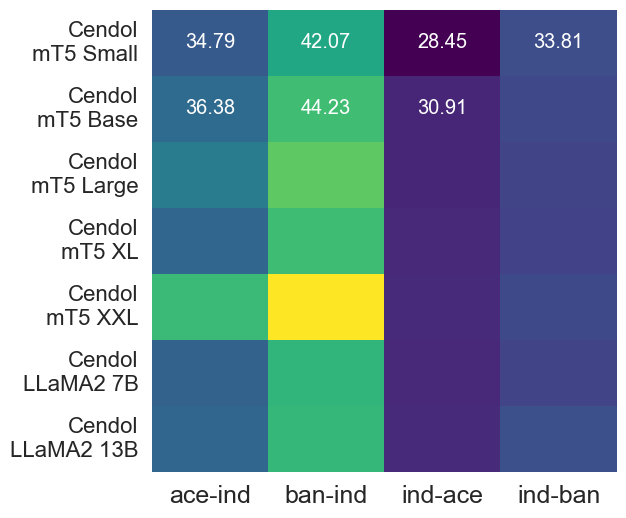

In [69]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.2)

pdf = df.copy()
pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['SacreBLEU','ROUGEL','chrF++']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])

pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['dataset'].isin(nlg_unseen_langs)]

pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('-')[1].split('_')[0] + '-' + x.split('-')[2].split('_')[0])

pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='chrF++').reset_index()
sns.heatmap(data=pdf[['ace-ind', 'ban-ind', 'ind-ace', 'ind-ban']], annot=True, fmt='.2f', cbar=False, cmap='viridis')
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], pdf['model_name'], rotation=0)

plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=0, fontsize=18)
plt.ylabel(None)
plt.xlabel(None)
# plt.legend(loc='upper center',  ncols=7)
# # ax.get_legend().set_visible(False)
# plt.xticks(rotation=0, fontsize=16)
# plt.ylabel('Weighted F1 Score (ind)')
# plt.xlabel(None)
# plt.yticks(fontsize=16)
plt.savefig('./figures/unseen_lang_nlg.pdf', bbox_inches='tight')
plt.show()

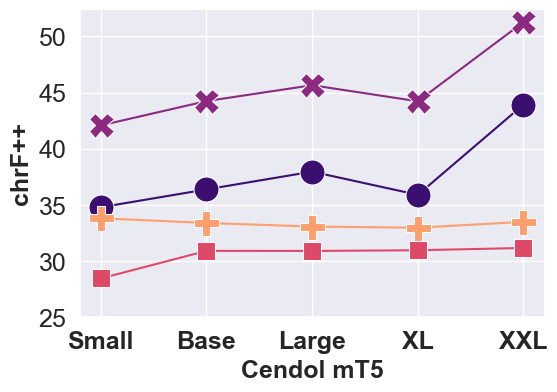

In [70]:
sns.set(rc={'figure.figsize':(6,4)})
# sns.set(font_scale=1.2)

# sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['SacreBLEU','ROUGEL','chrF++']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])

pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['dataset'].isin(nlg_unseen_langs)]

pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf = pdf[(~pdf['model'].str.startswith('cendol-llama2'))]
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('-')[1].split('_')[0] + '-' + x.split('-')[2].split('_')[0])

pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='chrF++').reset_index()
pdf = pdf.melt(id_vars=["model_id", "model_name"], 
        var_name="lang", 
        value_name="weighted_f1_score")
pdf["model_name"] = pdf["model_name"].apply(lambda x: x.replace("Cendol\nmT5 ", ""))

ax = sns.lineplot(data=pdf,
             x="model_name", y="weighted_f1_score",
             hue="lang", style="lang",
             markers=True, dashes=False, markersize=18,
             palette="magma", legend=False
)

handles, labels = ax.get_legend_handles_labels()

plt.yticks(rotation=0, fontsize=18)
plt.xticks(rotation=0, fontsize=18, fontweight="bold")
plt.ylabel("chrF++", fontdict={"weight": "bold", "size": 18})
plt.xlabel("Cendol mT5", fontdict={"weight": "bold", "size": 18})
plt.yticks(np.arange(25, 55, 5))

plt.savefig('./figures/unseen_lang_nlg_cendol_mt5.pdf', bbox_inches='tight')

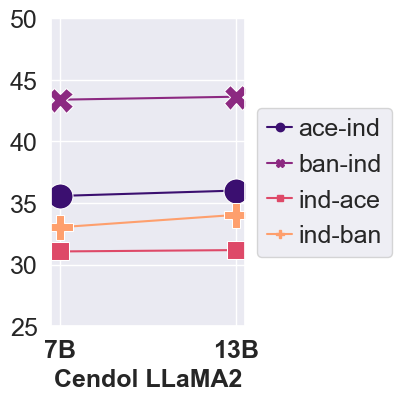

In [71]:
sns.set(rc={'figure.figsize':(2.5,4)})
# sns.set(font_scale=1.2)

# sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['SacreBLEU','ROUGEL','chrF++']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])

pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['dataset'].isin(nlg_unseen_langs)]

pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf = pdf[(~pdf['model'].str.startswith('cendol-mt5'))]
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('-')[1].split('_')[0] + '-' + x.split('-')[2].split('_')[0])

pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='chrF++').reset_index()
pdf = pdf.melt(id_vars=["model_id", "model_name"], 
        var_name="lang", 
        value_name="weighted_f1_score")
pdf["model_name"] = pdf["model_name"].apply(lambda x: x.replace("Cendol\nLLaMA2 ", ""))

ax = sns.lineplot(data=pdf,
             x="model_name", y="weighted_f1_score",
             hue="lang", style="lang",
             markers=True, dashes=False, markersize=18,
             palette="magma",
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, fontsize=18,
          handlelength=1, columnspacing=0.75, handletextpad=0.25,
        ncol=1,
          # loc='upper right',
          bbox_to_anchor=(1, 0.75),
         )

plt.yticks(rotation=0, fontsize=18)
plt.xticks(rotation=0, fontsize=18, fontweight="bold")
plt.ylabel(None)
# plt.ylabel("Weighted F1", fontdict={"weight": "bold"})
plt.xlabel("Cendol LLaMA2", fontdict={"weight": "bold", "size": 18})
plt.yticks(np.arange(25, 55, 5))
# plt.gca().get_yaxis().set_visible(False)

plt.savefig('./figures/unseen_lang_nlg_cendol_llama2.pdf', bbox_inches='tight')

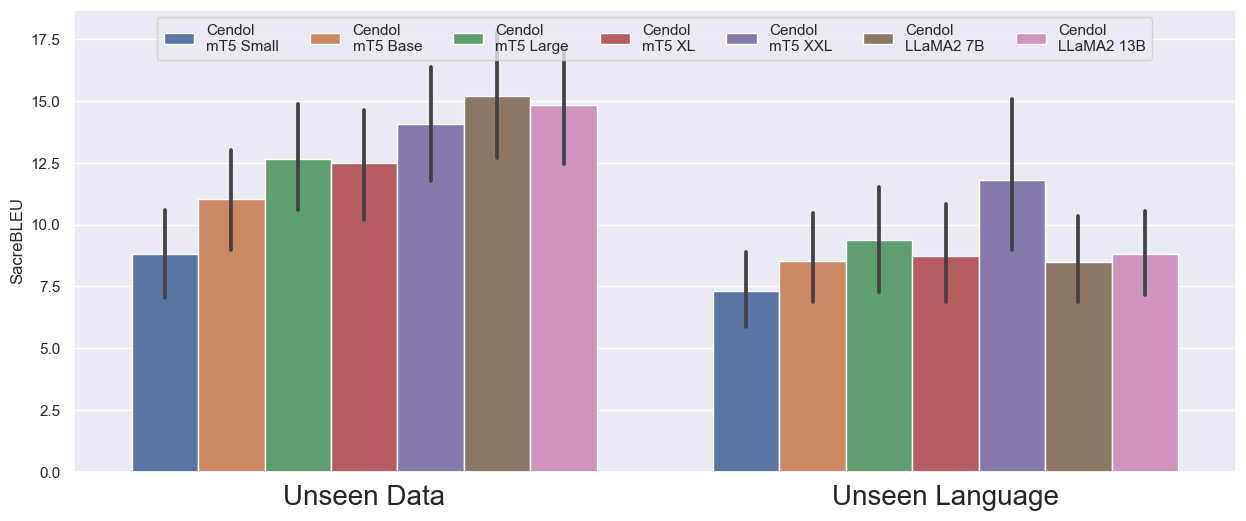

In [72]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])

pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.barplot(data=pdf, x='eval_type', y='SacreBLEU', hue='model_name')

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper center', ncols=7)
# ax.get_legend().set_visible(False)
plt.xticks(rotation=0, fontsize=20)
plt.ylabel('SacreBLEU')
plt.xlabel(None)
plt.show()